## Practice 1

### Víctor Galván Fraile

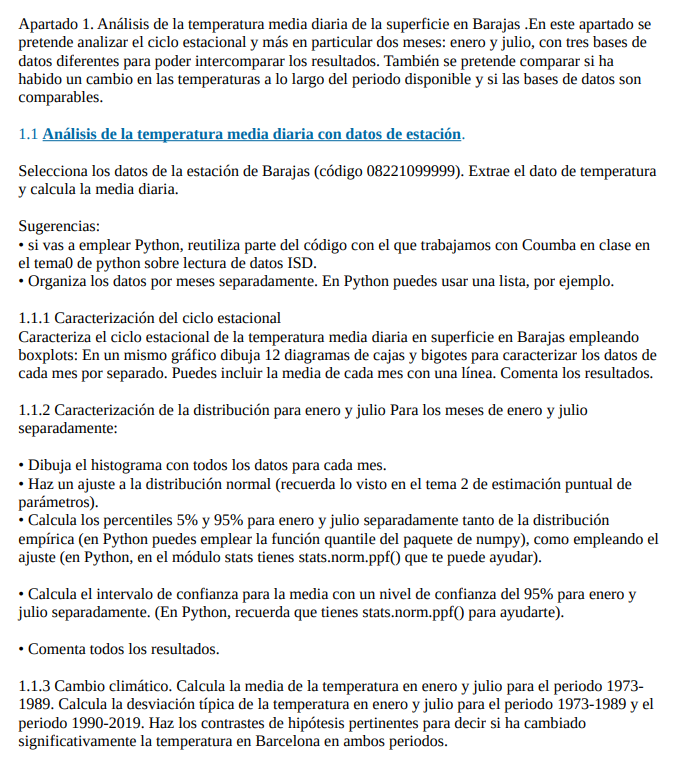

In [1]:
#Let's import first all the packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xarray as xr
from scipy import stats as sts
from cartopy import crs as ccrs # Cartography library
import cmocean as cmo #Oceanographic library for colormaps

In [2]:
path_stations= r"C:\Users\ideapad 5 15ITL05\Desktop\Meteo UCM\1 cuatrimestre\Analisis de datos en meteorologia\Repaso python\Dia 3\isd-history.csv"
stations=pd.read_csv(path_stations)
station_name= 'BARAJAS'
stations[stations['STATION NAME']== station_name]

USAF   WBAN STATION NAME CTRY STATE  ICAO     LAT    LON  ELEV(M)  \
2909  082210  99999      BARAJAS   SP   NaN  LEMD  40.494 -3.567    609.6   

         BEGIN       END  
2909  19310102  20201004

In [3]:
#Next, we build up the code of the station (we now it already from the statement of the exercise)
station_code=str(stations.loc[(stations['STATION NAME']==station_name)]['USAF'].values[0]) + '-' + \
    str(stations.loc[(stations['STATION NAME']==station_name)]['WBAN'].values[0])
print('The code from the station of '+station_name+' is '+station_code+'.')

#Now, let's download the data from NOAA.
#More info of the data is located in https://www.ncei.noaa.gov/pub/data/noaa/isd-lite/isd-lite-format.txt.
colNames=['year','month','day','hour','temp','tempd','slp','windDir','windSpeed','cloud','pcp1h','pcp6h']
dataType=['int','int','int','int','float','float','int','int','int','int','int','int',]
limits=[(0,4),(5,7),(8,10),(11,13),(14,19),(20,25),(26,31),(32,37),(38,43),(44,49),(50,55),(56,61)]
yearInit=1973
yearEnd=2020

isd_data=pd.DataFrame(columns=colNames)
for iyr in range(yearInit, yearEnd, 1):
    fil='https://www.ncei.noaa.gov/pub/data/noaa/isd-lite/'+str(iyr)+'/'+station_code +'-'+ str(iyr)+'.gz'
    data= pd.read_fwf(fil,sep=' ',compression='gzip',head=0,
                     names=colNames,colspecs=limits)
    isd_data = pd.concat([isd_data,data])

The code from the station of BARAJAS is 082210-99999.


In [4]:
#Let's look up for missing data and scale the data
dictType={ colNames[i] : dataType[i] for i in range(12)}
isd_data = isd_data.astype(dictType,copy=True)

scaling_factor_temp= 10
isd_data = isd_data.replace(-9999,np.NaN)
isd_data['temp'] = isd_data["temp"].apply(lambda x: x/scaling_factor_temp)
isd_data.head()

year  month  day  hour  temp  tempd      slp  windDir  windSpeed  cloud  \
0  1973      1    1     0   1.0  -10.0      NaN      0.0        0.0    0.0   
1  1973      1    1     1   0.0  -20.0      NaN    330.0       20.0    NaN   
2  1973      1    1     2  -1.0  -20.0      NaN      0.0        0.0    NaN   
3  1973      1    1     3  -1.0  -20.0  10230.0      0.0        0.0    0.0   
4  1973      1    1     4  -1.0  -20.0      NaN      0.0        0.0    NaN   

   pcp1h  pcp6h  
0    NaN    NaN  
1    NaN    NaN  
2    NaN    NaN  
3    NaN    NaN  
4    NaN    NaN

In [5]:
#Having done these, let's divide the data period as said in the statement, as well as taking only the temperature data.
isd_data_firstperiod= isd_data[isd_data['year']<1991].iloc[:,0:5]
isd_data_secondperiod= isd_data[isd_data['year']>=1991].iloc[:,0:5]
print('First period shape: ',isd_data_firstperiod.shape)
print('Second period shape: ',isd_data_secondperiod.shape)
isd_data_firstperiod.tail()

daily_mean = isd_data.groupby(['year','month','day']).mean().drop(['hour'],axis=1).reset_index()

First period shape:  (151395, 5)
Second period shape:  (217646, 5)


In [6]:
months= ['January','February','March','April','May','June','July','August','September','October','November','December']
daily_mean_firstperiod = isd_data_firstperiod.groupby(['year','month','day']).mean().drop(['hour'],axis=1).reset_index()
monthly_mean_firstperiod = daily_mean_firstperiod.groupby(['year','month']).mean().reset_index()
monthly_mean_firstperiod['MONTH']= monthly_mean_firstperiod['month']-1 #for representation purposes
yearly_mean_firstperiod = monthly_mean_firstperiod.groupby(['year']).mean().reset_index()

daily_mean_secondperiod = isd_data_secondperiod.groupby(['year','month','day']).mean().drop(['hour'],axis=1).reset_index()
monthly_mean_secondperiod = daily_mean_secondperiod.groupby(['year','month']).mean().reset_index()
monthly_mean_secondperiod['MONTH']= monthly_mean_secondperiod['month']-1 #for representation purposes
yearly_mean_secondperiod = monthly_mean_secondperiod.groupby(['year']).mean().reset_index()
monthly_mean_firstperiod.tail()

year  month   day       temp  MONTH
211  1990      8  16.0  25.305097      7
212  1990      9  15.5  21.347768      8
213  1990     10  16.0  14.511861      9
214  1990     11  15.5   8.075170     10
215  1990     12  16.0   3.618880     11

In [7]:
plt.style.use('seaborn')
def plotter_boxplots(data,x_axis_variable_name,y_axis_variable_name, xlabel,ylabel,title,labels_condition,ticks_labels, mean_line_condition,mean_data,x_variable_mean,mean_legend):
    fig,ax= plt.subplots()
    flierprops = dict(marker='o', markersize=5, markeredgecolor='black', markerfacecolor='green', alpha=0.5)
    sns.boxplot(x=x_axis_variable_name,y=y_axis_variable_name,data=data[[x_axis_variable_name,y_axis_variable_name]], palette='YlOrBr',showfliers = True, flierprops=flierprops)
    #sns.violinplot(x=x_axis_variable_name,y=y_axis_variable_name,data=data[[x_axis_variable_name,y_axis_variable_name]], palette='YlOrBr',showfliers = True, flierprops=flierprops)
    plt.xlabel(xlabel, fontsize= 14, fontweight='bold')
    plt.ylabel(ylabel, fontsize= 14, fontweight='bold')
    plt.title(title, fontsize= 16, fontweight='bold')
    if mean_line_condition==True:
        sns.lineplot(x=x_variable_mean,y=y_axis_variable_name,data=mean_data[[x_variable_mean,y_axis_variable_name]],label=mean_legend,legend='auto')   
        plt.legend(loc='best')
    if labels_condition==True:
        plt.xticks(ticks=np.arange(len(ticks_labels)),labels=ticks_labels, fontsize= 12, fontweight='bold',rotation=25)
    plt.show()

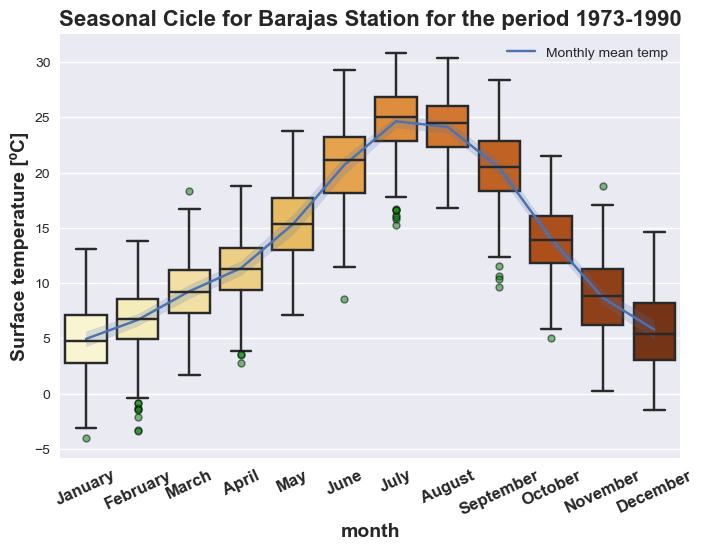

In [8]:
plotter_boxplots(daily_mean_firstperiod,'month','temp','month','Surface temperature [ºC]','Seasonal Cicle for Barajas Station for the period 1973-1990',True,months,True,monthly_mean_firstperiod,'MONTH','Monthly mean temp')

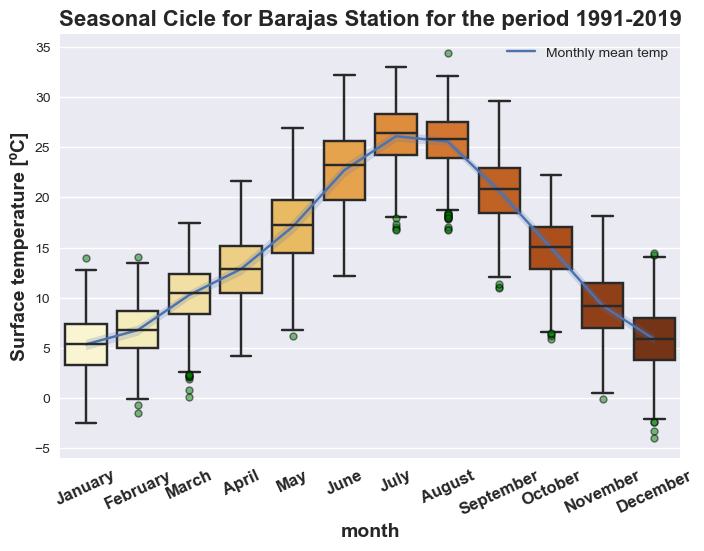

In [9]:
plotter_boxplots(daily_mean_secondperiod,'month','temp','month','Surface temperature [ºC]','Seasonal Cicle for Barajas Station for the period 1991-2019',True,months,True,monthly_mean_secondperiod,'MONTH','Monthly mean temp')

In [10]:
january_daily_mean_firstperiod= daily_mean_firstperiod[daily_mean_firstperiod['month']==1]
july_daily_mean_firstperiod= daily_mean_firstperiod[daily_mean_firstperiod['month']==7]
january_daily_mean_secondperiod= daily_mean_secondperiod[daily_mean_secondperiod['month']==1]
july_daily_mean_secondperiod= daily_mean_secondperiod[daily_mean_secondperiod['month']==7]

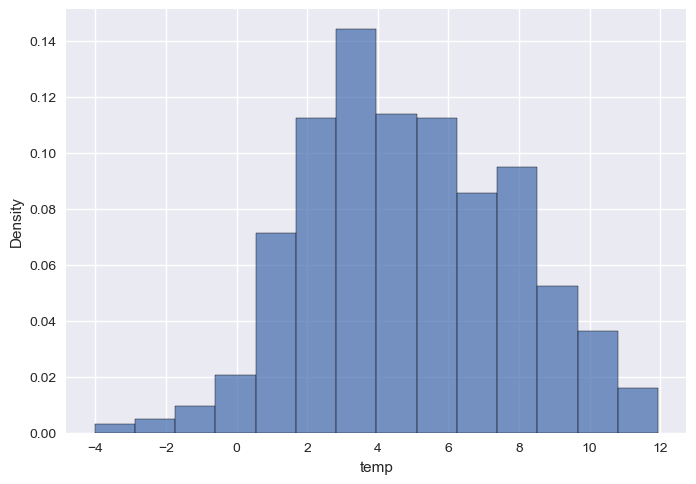

In [11]:
def histogram_plotter(data,variable):
    bins= np.arange(np.min(data[variable]),np.max(data[variable]),step=(np.max(data[variable])-np.min(data[variable]))/15)
    fig,ax= plt.subplots()
    sns.histplot(data, x=variable,bins=bins,kde = False, stat='density')

histogram_plotter(january_daily_mean_firstperiod,'temp')

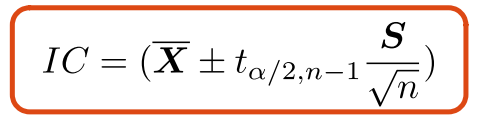


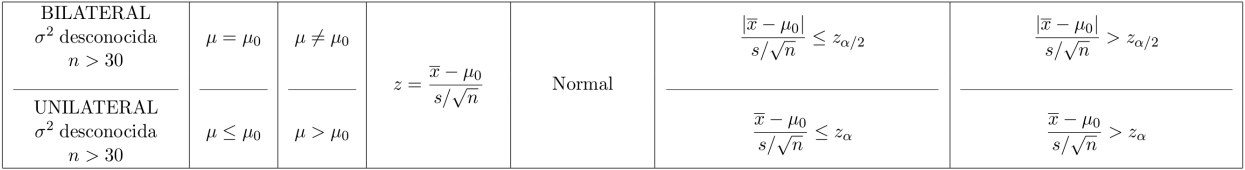

In [12]:
def histogram_plotter_with_normal_estimation(data:pd.DataFrame,variable:str,variable_name:str,title:str, verbose:bool=True) -> None:
    """
    description:
    --------------------------------------
    
    arguments:
        - data: entry dataframe
        - variable: name of the variable of study
        - title: plot title
        - verbose: True if you want the stats asociated with the variable
    """
    mean= np.mean(data[variable])
    std= np.std(data[variable])
    n= np.shape(data[variable])[0]
    bins= np.arange(np.min(data[variable]),np.max(data[variable]),step=(np.max(data[variable])-np.min(data[variable]))/20)
    fig,ax= plt.subplots()
    sns.histplot(data, x=variable,bins=bins,stat='density')
    normal_distribution= sts.norm.pdf(bins,mean,std)
    plt.plot(bins,normal_distribution,'red',label='Theoric')
    plt.legend(loc='best')
    plt.xlabel(variable_name)
    plt.title(title)
    plt.show()
    quantile_data= np.quantile(data[variable],(0.05,0.95))
    quantile_theoric= [sts.norm.ppf(0.05,mean,std),sts.norm.ppf(0.95,mean,std)]
    if verbose:
        print('Percentiles for the data are: q(5%%)=%.2f and q(95%%)= %.2f' %(quantile_data[0],quantile_data[1]))
        print('Percentiles for the theoric distribution are: q(5%%)=%.2f and q(95%%)= %.2f' %(quantile_theoric[0],quantile_theoric[1]))
        print('Índice de Confianza del 95%')
        alfa=0.05
        #We must use the t-student distribution, beacuse with don't now the standard deviation of the data
        t_alpha_2= sts.t.ppf(1-alfa/2,n-1)
        ic= t_alpha_2*std/np.sqrt(n)
        print('IC= [%.2f+-%.2f] (ºC)'%(mean,ic))
        print('With scipy function:')
        ic_scipy=sts.t.interval(confidence=0.95,df=n-1,loc=mean,scale= std/np.sqrt(n))
        print(ic_scipy)

daily_mean    
january_daily_mean= daily_mean[daily_mean['month']==1]
july_daily_mean= daily_mean[daily_mean['month']==7]
periods= ['1973-2019','1973-1990','1990-2019']

## 1.Stats for whole period

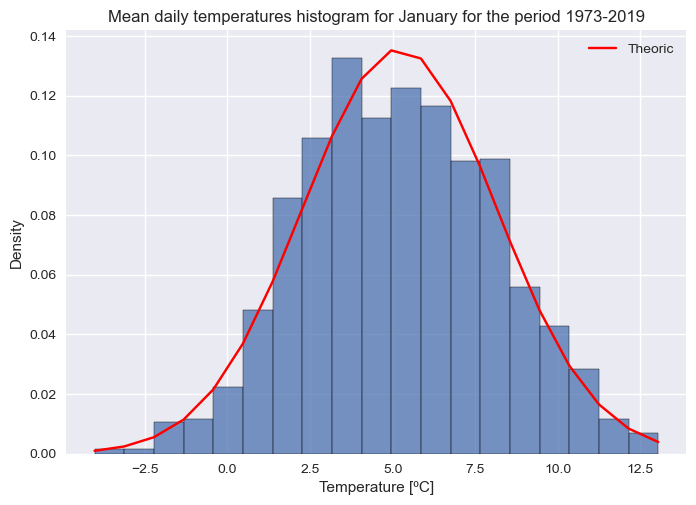

Percentiles for the data are: q(5%)=0.68 and q(95%)= 10.20
Percentiles for the theoric distribution are: q(5%)=0.38 and q(95%)= 10.05
Índice de Confianza del 95%
IC= [5.21+-0.15] (ºC)
With scipy function:
(5.061642316730847, 5.364033330142135)


In [13]:
histogram_plotter_with_normal_estimation(january_daily_mean,'temp','Temperature [ºC]','Mean daily temperatures histogram for January for the period '+periods[0])

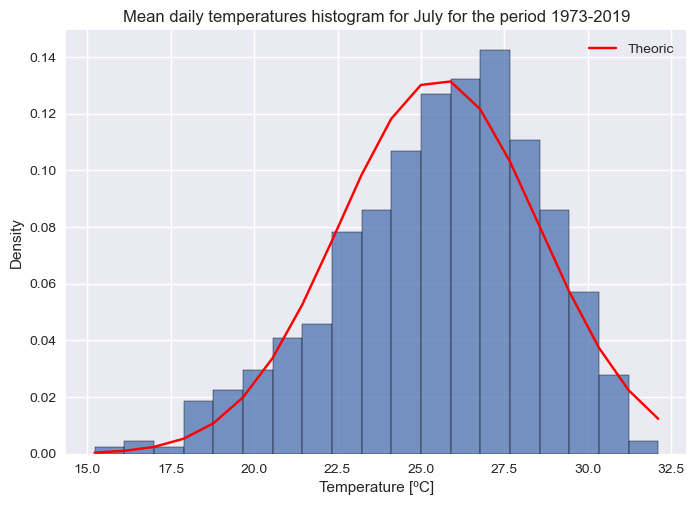

Percentiles for the data are: q(5%)=19.94 and q(95%)= 29.86
Percentiles for the theoric distribution are: q(5%)=20.58 and q(95%)= 30.50
Índice de Confianza del 95%
IC= [25.54+-0.16] (ºC)
With scipy function:
(25.383785005532744, 25.693858670064834)


In [14]:
histogram_plotter_with_normal_estimation(july_daily_mean,'temp','Temperature [ºC]','Mean daily temperatures histogram for July for the period '+periods[0])

## 2.Stats for the two subperiods

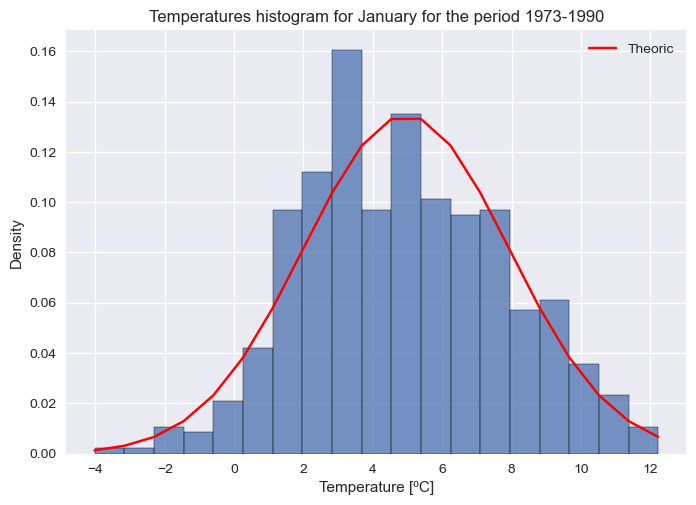

Percentiles for the data are: q(5%)=0.76 and q(95%)= 9.98
Percentiles for the theoric distribution are: q(5%)=0.08 and q(95%)= 9.84
Índice de Confianza del 95%
IC= [4.96+-0.25] (ºC)
With scipy function:
(4.715694291295337, 5.2090548166695925)


In [15]:
histogram_plotter_with_normal_estimation(january_daily_mean_firstperiod,'temp','Temperature [ºC]','Temperatures histogram for January for the period '+periods[1])

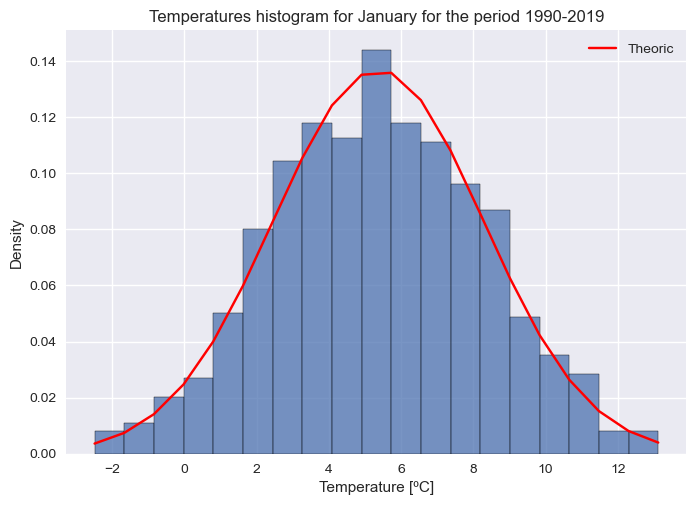

Percentiles for the data are: q(5%)=0.61 and q(95%)= 10.24
Percentiles for the theoric distribution are: q(5%)=0.57 and q(95%)= 10.16
Índice de Confianza del 95%
IC= [5.37+-0.19] (ºC)
With scipy function:
(5.1776024608974955, 5.559339342668907)


In [16]:
histogram_plotter_with_normal_estimation(january_daily_mean_secondperiod,'temp','Temperature [ºC]','Temperatures histogram for January for the period '+periods[2])

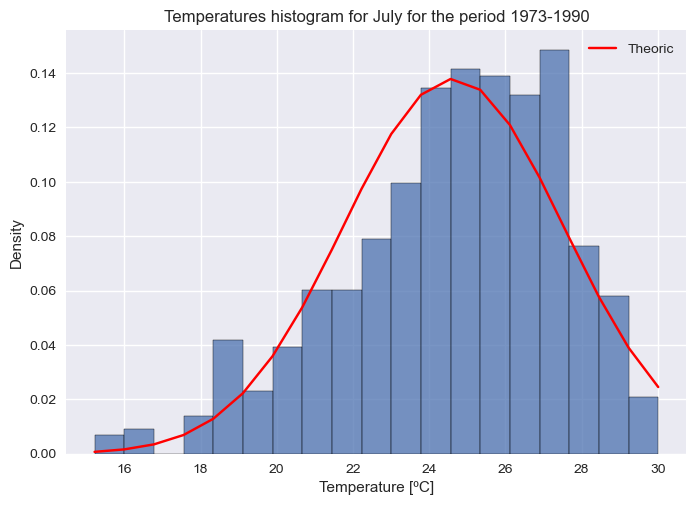

Percentiles for the data are: q(5%)=19.03 and q(95%)= 28.64
Percentiles for the theoric distribution are: q(5%)=19.88 and q(95%)= 29.40
Índice de Confianza del 95%
IC= [24.64+-0.24] (ºC)
With scipy function:
(24.396141159662044, 24.877306033139376)


In [17]:
histogram_plotter_with_normal_estimation(july_daily_mean_firstperiod,'temp','Temperature [ºC]','Temperatures histogram for July for the period '+periods[1])

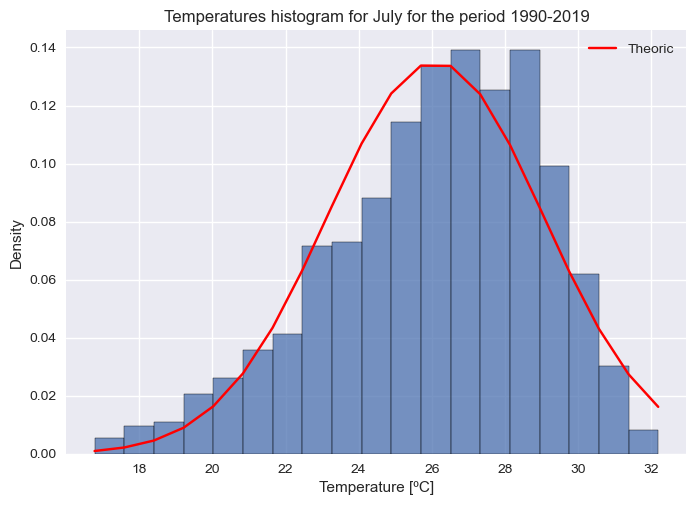

Percentiles for the data are: q(5%)=20.42 and q(95%)= 30.26
Percentiles for the theoric distribution are: q(5%)=21.24 and q(95%)= 30.96
Índice de Confianza del 95%
IC= [26.10+-0.19] (ºC)
With scipy function:
(25.90527380462026, 26.292215963747342)


In [18]:
histogram_plotter_with_normal_estimation(july_daily_mean_secondperiod,'temp','Temperature [ºC]','Temperatures histogram for July for the period '+periods[2])

### Cambio Climático estación de Barcelona

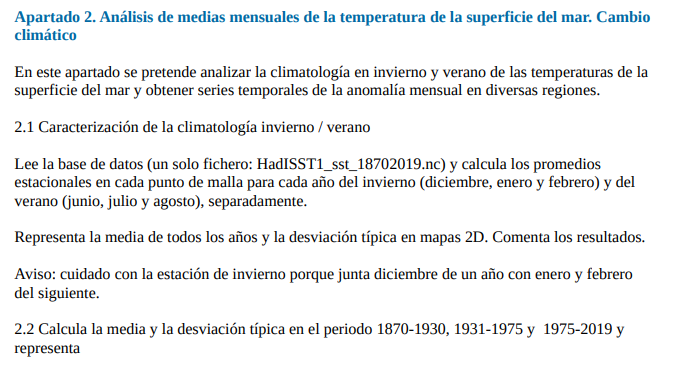

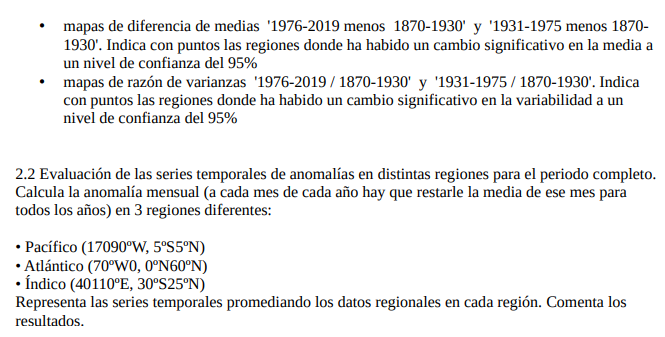

In [2]:
sst_path= r"C:\Users\ideapad 5 15ITL05\Desktop\Meteo UCM\1 cuatrimestre\Analisis de datos en meteorologia\Practica 1\Datos\HadISST1_sst_1870-2019.nc"
sst= xr.open_dataset(sst_path)
sst

<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 180, time: 1800)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * time       (time) datetime64[ns] 1870-01-16T12:00:00 ... 2019-12-16T12:00:00
Data variables:
    sst        (time, latitude, longitude) float32 ...
Attributes:
    CDI:                        Climate Data Interface version 1.7.0rc4 (http...
    Conventions:                CF-1.0
    history:                    Thu Sep 10 13:01:22 2020: cdo setmissval,-100...
    source:                     HadISST
    institution:                Met Office Hadley Centre
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...
    CDO:                        Climate Data Operators version 1.7.0rc6 (http...

In [3]:
jan= sst.sst[sst['time.season']=='DJF',:,:].squeeze()
seasons= np.mean(sst.groupby('time.season'))
seasons_std= np.std(sst.groupby('time.season'))

seasons

C:\Users\ideapad 5 15ITL05\anaconda3\envs\Analisisdatosucm2\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ideapad 5 15ITL05\anaconda3\envs\Analisisdatosucm2\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ideapad 5 15ITL05\anaconda3\envs\Analisisdatosucm2\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ideapad 5 15ITL05\anaconda3\envs\Analisisdatosucm2\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 180, season: 4)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst        (season, latitude, longitude) float32 -1.8 -1.8 -1.8 ... nan nan

In [4]:
winter= seasons.sst[seasons['season']=='DJF',:,:].squeeze()
winter_std= seasons_std.sst[seasons_std['season']=='DJF',:,:].squeeze()
summer= seasons.sst[seasons['season']=='JJA',:,:].squeeze()
summer_std= seasons_std.sst[seasons_std['season']=='JJA',:,:].squeeze()
summer

<xarray.DataArray 'sst' (latitude: 180, longitude: 360)>
array([[-1.8000008, -1.7999954, -1.7999954, ..., -1.8000007, -1.8000007,
        -1.8000007],
       [-1.7999927, -1.7999927, -1.7999927, ..., -1.7999927, -1.7999927,
        -1.7999927],
       [-1.7999926, -1.7999926, -1.7999926, ..., -1.7999926, -1.7999927,
        -1.7999927],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
    season     <U3 'JJA'

In [5]:
months= sst.groupby('time.month').mean()

In [6]:
months

<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 180, month: 12)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst        (month, latitude, longitude) float32 -1.8 -1.8 -1.8 ... nan nan

In [7]:
#Manually
jan= months.sst[(months['month']==1)]
winter_manual= months.sst[(months['month']==12)|(months['month']<3)].mean(axis=0)
summer_manual= months.sst[(months['month']>5)&(months['month']<9)].mean(axis=0)
winter

<xarray.DataArray 'sst' (latitude: 180, longitude: 360)>
array([[-1.7999997, -1.7999997, -1.7999997, ..., -1.7999996, -1.7999996,
        -1.7999996],
       [-1.7999995, -1.7999995, -1.7999995, ..., -1.7999995, -1.7999995,
        -1.7999995],
       [-1.8000004, -1.8000002, -1.7999998, ..., -1.8000003, -1.8000004,
        -1.8000001],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
    season     <U3 'DJF'

Doing a quick analysis of the data, we see that the dates (hour and day) from which the data is collected differ from one to another. Anyway, we will take each of them as the mean SST value for each month.

In [8]:
lat=winter.latitude
lon=winter.longitude

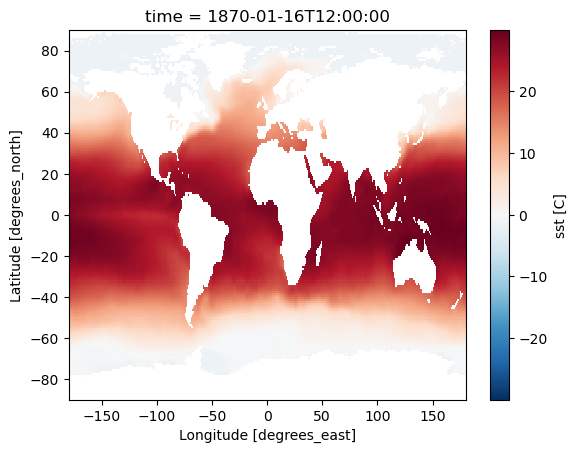

In [9]:
sst['sst'].sel(time='1870-01-16T12:00:00.000000000').plot()

In [10]:
def dibujo_1_mapa_cartopy(A,lon,lat,cmap1,l1,titulo, ax,levels):
    im=ax.contourf(lon,lat,A,cmap=cmap1,levels=levels,extend='both',transform=ccrs.PlateCarree())
    ax.coastlines(linewidth=2)
    ax.set_title(titulo,fontsize=28)
    gl=ax.gridlines(draw_labels = True)
    gl.ylabels_right = False
    gl.xlabels_top = False
    fig.colorbar(im,ax=ax,label=l1)
    

C:\Users\ideapad 5 15ITL05\anaconda3\envs\Analisisdatosucm2\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\ideapad 5 15ITL05\anaconda3\envs\Analisisdatosucm2\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


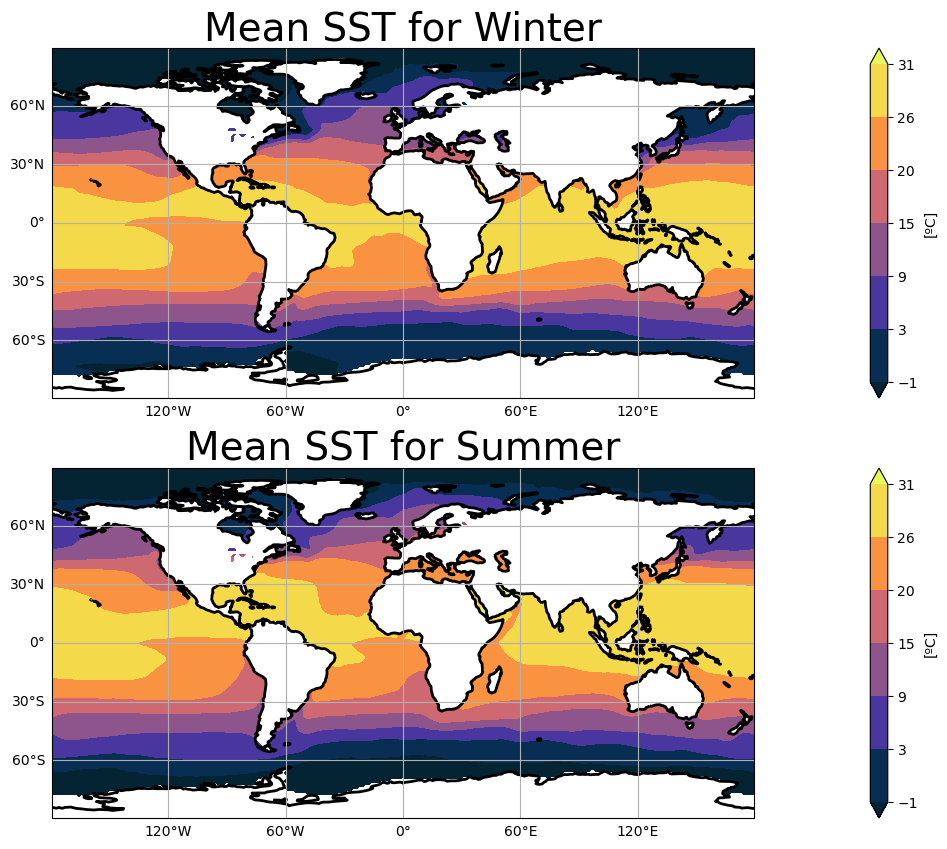

In [16]:
fig = plt.figure(figsize=(30,10)) 
ax1 = fig.add_subplot(211, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())

levels1 = np.linspace(np.min(np.array([np.min(winter),np.min(summer)])),np.max(np.array([np.max(winter),np.max(summer)])),num=7).astype(int)
dibujo_1_mapa_cartopy(winter,lon,lat,cmo.cm.thermal,'[ºC]','Mean SST for Winter', ax1,levels1)
dibujo_1_mapa_cartopy(summer,lon,lat,cmo.cm.thermal,'[ºC]','Mean SST for Summer', ax2,levels1)




C:\Users\ideapad 5 15ITL05\anaconda3\envs\Analisisdatosucm2\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\ideapad 5 15ITL05\anaconda3\envs\Analisisdatosucm2\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


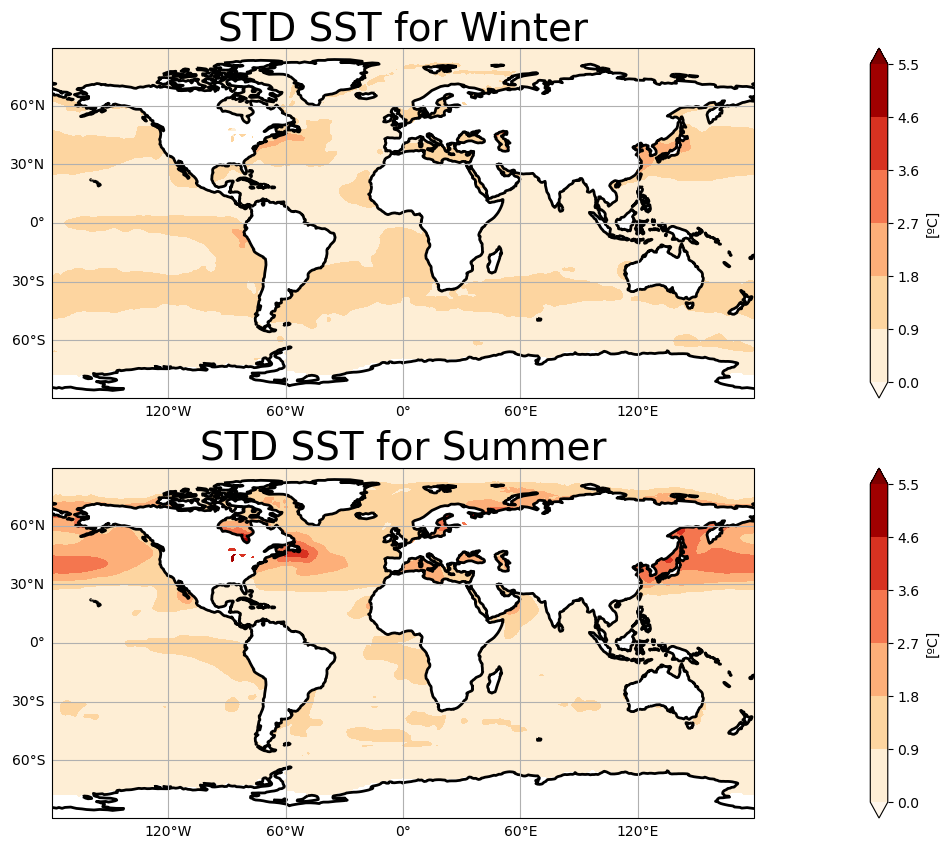

In [13]:
fig = plt.figure(figsize=(30,10)) 
ax1 = fig.add_subplot(211, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())

levels2 = np.round(np.linspace(np.min(np.array([np.min(winter_std),np.min(summer_std)])),np.max(np.array([np.max(winter_std),np.max(summer_std)])),num=7),decimals=1)
dibujo_1_mapa_cartopy(winter_std,lon,lat,'OrRd','[ºC]','STD SST for Winter', ax1,levels2)
dibujo_1_mapa_cartopy(summer_std,lon,lat,'OrRd','[ºC]','STD SST for Summer', ax2,levels2)

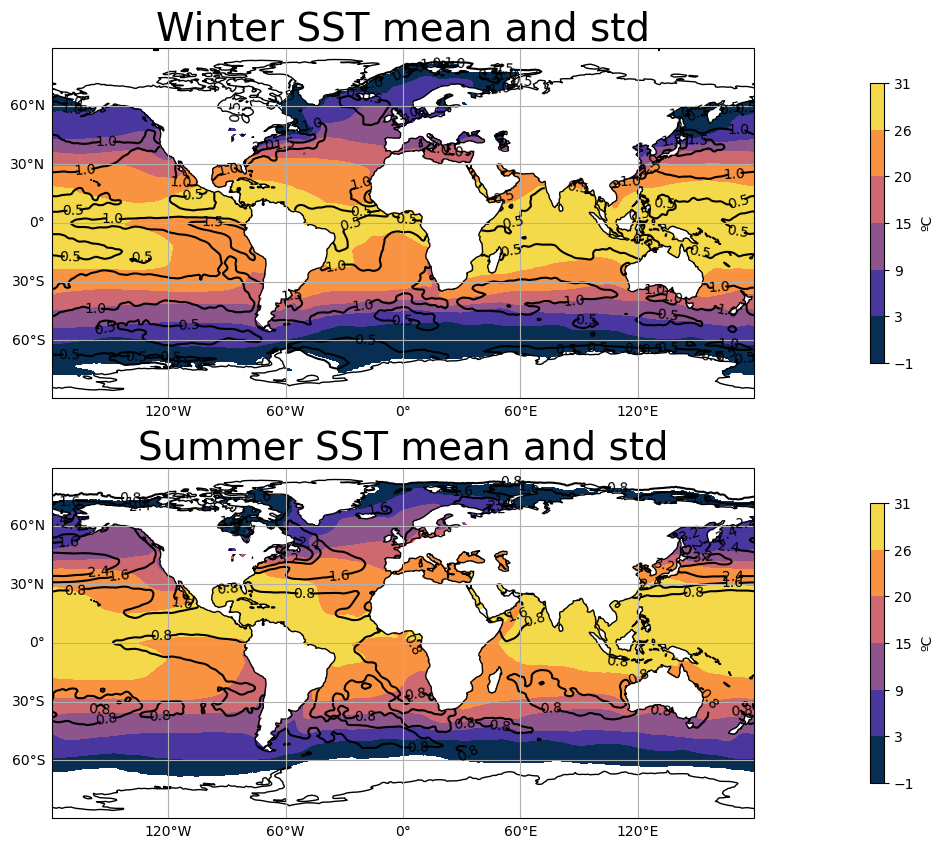

In [17]:
def DibujoMapaHorizontal(lon,lat,var1,var2,levels1,levels2, mapbar,unidades, titulo,ax):
    im=ax.contourf(lon,lat,var1,levels1, cmap = mapbar)
    ax.coastlines(linewidth = 1)
    ax.set_title(titulo,fontsize=28)
    gl= ax.gridlines(draw_labels = True)
    gl.ylabels_right = False
    gl.xlabels_top = False
    fig.colorbar(im,ax=ax,shrink=0.8, label = unidades)
    im2=ax.contour(lon,lat,var2, colors='black')
    ax.clabel(im2, im2.levels, inline=True, fontsize=10)


    
fig = plt.figure(figsize=(30,10)) 
ax1 = fig.add_subplot(211, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())

DibujoMapaHorizontal(lon,lat,winter,winter_std,levels1,levels2,cmo.cm.thermal,'ºC','Winter SST mean and std',ax1)
DibujoMapaHorizontal(lon,lat,summer,summer_std,levels1,levels2,cmo.cm.thermal,'ºC','Summer SST mean and std',ax2)

### 2.2. Mean differences and variance rates 

In [38]:
sst.sst

<xarray.DataArray 'sst' (time: 1800, latitude: 180, longitude: 360)>
[116640000 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * time       (time) datetime64[ns] 1870-01-16T12:00:00 ... 2019-12-16T12:00:00
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [39]:
#Periodos: 1870-1930,1931-1975,1976-2019.
first_period= sst.isel(time=np.where(sst['time.year']<1931)[0])
second_period= sst.isel(time=np.where((sst['time.year']>1930)&(sst['time.year']<1976))[0])
third_period= sst.isel(time=np.where((sst['time.year']>1975))[0])
third_period.sst[0,0,:].mean()

<xarray.DataArray 'sst' ()>
array(nan, dtype=float32)
Coordinates:
    latitude  float32 89.5
    time      datetime64[ns] 1976-01-16T12:00:00

In [40]:
first_period.isel(longitude= np.where(first_period['longitude']==-179.5)[0])

<xarray.Dataset>
Dimensions:    (longitude: 1, latitude: 180, time: 732)
Coordinates:
  * longitude  (longitude) float32 -179.5
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * time       (time) datetime64[ns] 1870-01-16T12:00:00 ... 1930-12-16T12:00:00
Data variables:
    sst        (time, latitude, longitude) float32 ...
Attributes:
    CDI:                        Climate Data Interface version 1.7.0rc4 (http...
    Conventions:                CF-1.0
    history:                    Thu Sep 10 13:01:22 2020: cdo setmissval,-100...
    source:                     HadISST
    institution:                Met Office Hadley Centre
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...
    CDO:                        Climate Data Operators version 1.7.0rc6 (http...

In [41]:
first_period_mean= first_period.sst.mean(axis=0)
second_period_mean= second_period.sst.mean(axis=0)
third_period_mean= third_period.sst.mean(axis=0)
first_period_std= first_period.sst.std(axis=0)
second_period_std= second_period.sst.std(axis=0)
third_period_std= third_period.sst.std(axis=0)
third_period_std

C:\Users\ideapad 5 15ITL05\anaconda3\envs\Analisisdatosucm2\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ideapad 5 15ITL05\anaconda3\envs\Analisisdatosucm2\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ideapad 5 15ITL05\anaconda3\envs\Analisisdatosucm2\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


<xarray.DataArray 'sst' (latitude: 180, longitude: 360)>
array([[8.4323278e-03, 2.1457672e-06, 8.8160494e-03, ..., 8.7951999e-03,
        8.6721368e-03, 8.4973630e-03],
       [4.0531158e-06, 3.9339066e-06, 3.8146973e-06, ..., 4.0531158e-06,
        4.0531158e-06, 4.0531158e-06],
       [5.7220459e-06, 5.6028366e-06, 5.3644180e-06, ..., 5.6028366e-06,
        5.4836273e-06, 5.3644180e-06],
       ...,
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5

In [36]:
n1= first_period.time.shape[0]
#ttest= sts.ttest_ind(first_period.sst[:,:,0],second_period.sst[:,:,0],axis=0,nan_policy='omit')

ttest= np.empty((180,360))
mask_auto= np.zeros((180,360))

for i in range(0,180):
    #ttest[i,:]= sts.ttest_ind(first_period.sst[:,i,:],third_period.sst[:,i,:],axis=0,nan_policy='omit').pvalue[0]
    for j in range(0,360):
        ttest[i,j]= sts.ttest_ind(first_period.sst[:,i,j],third_period.sst[:,i,j],nan_policy='omit').pvalue
        if ttest[i,j]>0.05:
            mask_auto[i,j]=1
    if i%30==0:
        print(i,j)

0 359


C:\Users\ideapad 5 15ITL05\anaconda3\envs\Analisisdatosucm2\lib\site-packages\scipy\stats\_mstats_basic.py:1291: RuntimeWarning: divide by zero encountered in divide
  denom = ma.sqrt(svar*(1.0/n1 + 1.0/n2))  # n-D computation here!
C:\Users\ideapad 5 15ITL05\AppData\Local\Temp\ipykernel_10592\3071323170.py:10: UserWarning: Warning: converting a masked element to nan.
  ttest[i,j]= sts.ttest_ind(first_period.sst[:,i,j],third_period.sst[:,i,j],nan_policy='omit').pvalue


KeyboardInterrupt: 

In [2]:
mask_auto

NameError: name 'mask_auto' is not defined

In [ ]:
a= sts.ttest_ind(first_period.sst[:,:,:],third_period.sst[:,:,:],axis=0,nan_policy='omit')
a

In [ ]:
b= a.pvalue.data
c= np.empty(np.shape(b))
for i in range(b.shape[0]):
    for j in range(b.shape[1]):
        if b[i,j]>0.05:
            c[i,j]=1
        else:
            c[i,j]=0

C:\Users\ideapad 5 15ITL05\anaconda3\envs\Analisisdatosucm2\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\ideapad 5 15ITL05\anaconda3\envs\Analisisdatosucm2\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


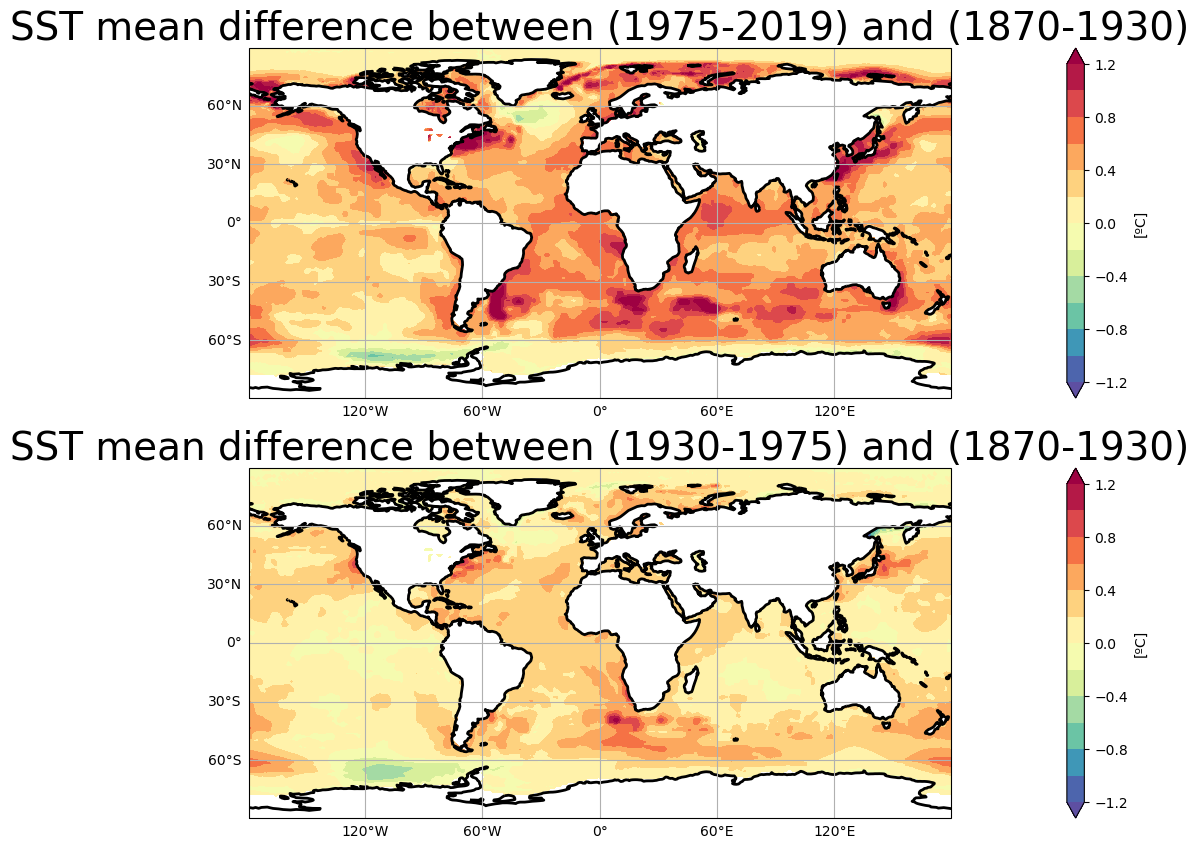

In [50]:
#Let's compute the mean differences that we will study. (third-first and second-first)
mean_first_difference= third_period_mean-first_period_mean
mean_second_difference= second_period_mean-first_period_mean
#Then, let's represent the results before doing the confidence interval.
fig = plt.figure(figsize=(30,10)) 
ax1 = fig.add_subplot(211, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())

levels3 = np.round(np.linspace(np.min(np.array([np.min(mean_first_difference),np.min(mean_second_difference)])),np.max(np.array([np.max(mean_first_difference),np.max(mean_second_difference)])),num=10),decimals=1)
levels3= np.arange(-1.2,1.3,0.2)

dibujo_1_mapa_cartopy(mean_first_difference,lon,lat,'Spectral_r','[ºC]','SST mean difference between (1975-2019) and (1870-1930)', ax1,levels3)
dibujo_1_mapa_cartopy(mean_second_difference,lon,lat,'Spectral_r','[ºC]','SST mean difference between (1930-1975) and (1870-1930)', ax2,levels3)

# Manera manual de hacer la significancia, no hace falta ejecutar
def normal(mean1,mean2,n1,n2,std1,std2):
    z= np.abs(mean1-mean2)/np.sqrt(std1/n1+std2/n2)
    return z

np.warnings.filterwarnings('ignore')
alfa=0.05 #para un 95% de confianza
mask_manual= np.empty((first_period.latitude.shape[0],first_period.longitude.shape[0]))

data1= first_period.sst #time-latitude-longitude
data2= third_period.sst 
n1= first_period.sst.shape[0]
n2= third_period.sst.shape[0]
z_alpha_2= sts.norm.ppf(1-alfa/2)
for i in range(first_period.latitude.shape[0]):
    for j in range(first_period.longitude.shape[0]):
        z= normal(first_period_mean[i,j],third_period_mean[i,j],n1,n2,first_period_std[i,j],third_period_std[i,j])
        if z<=z_alpha_2:
            mask_manual[i,j]=0
        else:
            mask_manual[i,j]=1
    if np.array(first_period.latitude[i])%10==0:
        print(np.array(first_period.latitude[i]),np.array(first_period.longitude[j]))

mask_manual

mask.shape

a=first_period.isel(latitude= np.where(first_period.latitude==40.5)[0],longitude= np.where(first_period.longitude==40.5)[0]).squeeze()
a.sst.shape

In [21]:
first_period.longitude

<xarray.DataArray 'longitude' (longitude: 360)>
array([-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

#Let's do the same plot as before but including the significance:
fig = plt.figure(figsize=(20,10)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

im=ax.contourf(lon,lat,mean_first_difference,cmap='Spectral_r',levels=levels3,extend='both',transform=ccrs.PlateCarree())
im2=ax.contourf(lon,lat,mask_auto,transform=ccrs.PlateCarree(),hatches=[' ','/'],alpha=0)
ax.coastlines(linewidth=2)
ax.set_title('Mean difference ttest point by point',fontsize=28)
gl=ax.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top = False
fig.colorbar(im,ax=ax,label='')

#Let's do the same plot as before but including the significance:
fig = plt.figure(figsize=(20,10)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

im=ax.contourf(lon,lat,mean_first_difference,cmap='Spectral_r',levels=levels3,extend='both',transform=ccrs.PlateCarree())
im2=ax.contourf(lon,lat,c,transform=ccrs.PlateCarree(),hatches=[' ','/'],alpha=0)
ax.coastlines(linewidth=2)
ax.set_title('Mean difference ttest in one step',fontsize=28)
gl=ax.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top = False
fig.colorbar(im,ax=ax,label='')

#Let's do the same plot as before but including the significance:
fig = plt.figure(figsize=(20,10)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
mpl.rcParams['hatch.linewidth'] = 2  # previous pdf hatch linewidth
im=ax.contourf(lon,lat,mean_first_difference,cmap='Spectral_r',levels=levels3,extend='both',transform=ccrs.PlateCarree())
im2=ax.contourf(lon,lat,mask,transform=ccrs.PlateCarree(),hatches=['','/'],alpha=0,linewidth=10)
ax.coastlines(linewidth=2)
ax.set_title('Mean difference manual',fontsize=28)
gl=ax.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top = False
fig.colorbar(im,ax=ax,label='')

C:\Users\ideapad 5 15ITL05\anaconda3\envs\Analisisdatosucm2\lib\site-packages\scipy\stats\_mstats_basic.py:1291: RuntimeWarning: divide by zero encountered in divide
  denom = ma.sqrt(svar*(1.0/n1 + 1.0/n2))  # n-D computation here!


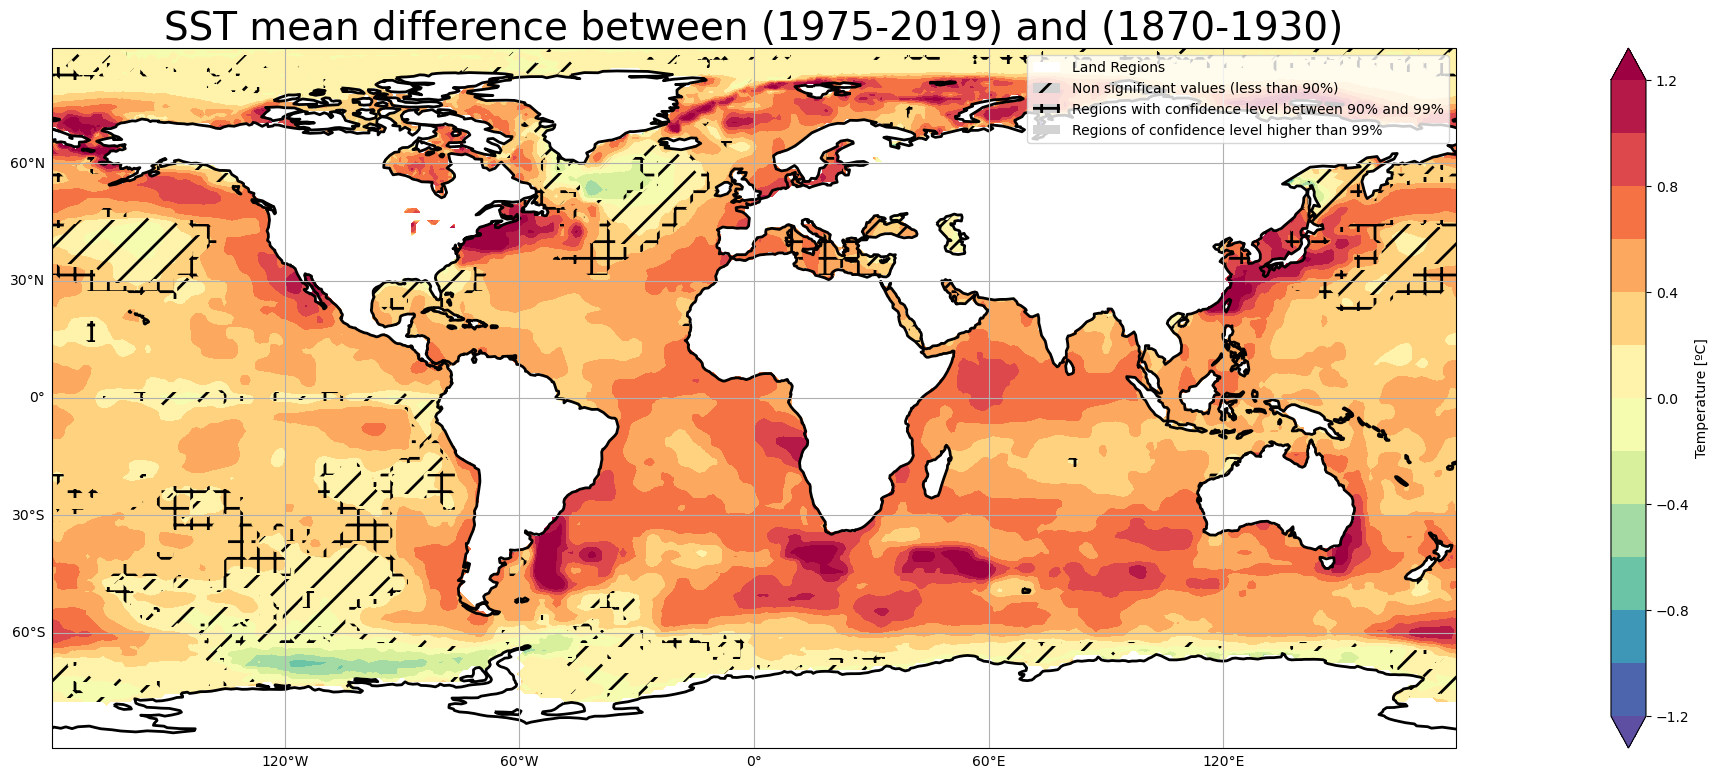

In [51]:
#Having seen that we obtain the same results with the three different methods, let's use the most efficient one now:
pvalue= sts.ttest_ind(first_period.sst[:,:,:],third_period.sst[:,:,:],axis=0,nan_policy='omit').pvalue.data

land= np.full(np.shape(pvalue), np.nan)
region1= np.full(np.shape(pvalue), np.nan)
region2= np.full(np.shape(pvalue), np.nan)
region23= np.full(np.shape(pvalue), np.nan)
region3= np.full(np.shape(pvalue), np.nan)

for i in range(pvalue.shape[0]):
    for j in range(pvalue.shape[1]):
        if (pvalue[i,j]<=0.1)&(np.isnan(pvalue[i,j])==False): #porque queremos rechazar la hipótesis de que las medias son iguales
            if pvalue[i,j]<=0.01:
                region3[i,j]=1
                region2[i,j]=1
            else:
                region23[i,j]=1
                region2[i,j]=1
        elif np.isnan(pvalue[i,j])==True:
            land[i,j]=1        
        else:
            region1[i,j]= 1

            
import matplotlib.patches as mpatches
            
#And plot the results:


fig = plt.figure(figsize=(40,20)) 
ax = fig.add_subplot(211, projection=ccrs.PlateCarree())
mpl.rcParams['hatch.linewidth'] = 2  # previous pdf hatch linewidth

a_val = 1
hatches= [None,'-','|',None]
#colors = ['#EA5739','#FEFFBE','#4BB05C']
#circ1 = mpatches.Patch( facecolor=colors[0],alpha=a_val,hatch='\\\\',label='Label1')
circ1 = mpatches.Patch(facecolor='white',alpha=a_val,hatch=None,label='Land Regions')
circ2 = mpatches.Patch(facecolor='lightgrey',alpha=a_val,hatch='/',label='Non significant values (less than 90%)')
circ3 = mpatches.Patch(facecolor='lightgrey',alpha=a_val,hatch='+',label='Regions with confidence level between 90% and 99%')
circ4 = mpatches.Patch(facecolor='lightgrey',alpha=a_val,hatch=None,label='Regions of confidence level higher than 99%')

im=ax.contourf(lon,lat,mean_first_difference,cmap='Spectral_r',levels=levels3,extend='both',transform=ccrs.PlateCarree())
ax.contourf(lon,lat,land,transform=ccrs.PlateCarree(),hatches=[None],alpha=0)
ax.contourf(lon,lat,region1,transform=ccrs.PlateCarree(),hatches=['/'],alpha=0)
ax.contourf(lon,lat,region23,transform=ccrs.PlateCarree(),hatches=['+'],alpha=0)
ax.contourf(lon,lat,region3,transform=ccrs.PlateCarree(),hatches=[None],alpha=0)


ax.coastlines(linewidth=2)
ax.set_title('SST mean difference between (1975-2019) and (1870-1930)',fontsize=28)
gl=ax.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top = False
ax.legend(handles = [circ1,circ2,circ3,circ4],loc='best')
fig.colorbar(im,ax=ax,label='Temperature [ºC]')

TypeError: Length of y (120) must match number of rows in z (180)

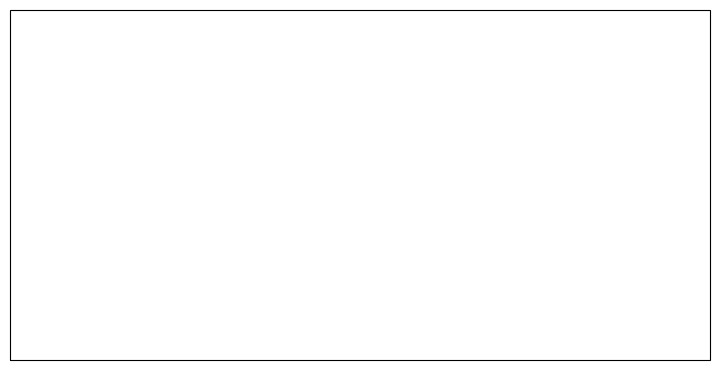

In [58]:
import numpy.ma as ma

def testt(sample1, sample2, alfa):
    #calculo primero la variable aleatoria que deja a la izquierda 1-alpha/2
    z_alpha_2 = sts.norm.ppf(1-alfa/2)
    
    [nt1,nf,nc]=np.shape(sample1)
    [nt2,nf,nc]=np.shape(sample1)
   #ahora calculo mi estadístico 
    z = abs(np.mean(sample1,axis=0)-np.mean(sample2,axis=0))/np.sqrt(np.var(sample1,axis=0,ddof=1)/nt1+np.var(sample2,axis=0,ddof=1)/nt2)
    #ahora elijo las zonas donde mi estadístico es menor que la variable zalpha/2 y, por tanto
    #elijo las zonas donde la media no ha cambiado
    A=z<z_alpha_2
    #ahora pongo una mascara a las zonas que entran en la region de aceptacion porque en esas
    #zonas no ha cambiado la media
    mx = ma.masked_array(sample1.mean(0)-sample2.mean(0), A)
    return mx

rechazo=testt(np.array(third_period.sst), np.array(first_period.sst), 0.01)
#pvalue1= sts.ttest_ind(first_period.sst[:,:,:],third_period.sst[:,:,:],axis=0,nan_policy='omit').pvalue.data
fig = plt.figure(figsize=(40, 10))
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree(0))
im=ax.contourf(lon,lat,rechazo,cmap='bwr',levels=[-1,-0.8,-0.6,-0.4,-.2,.2,.4,0.6,0.8,1,1.2],extend='both'
               ,transform = ccrs.PlateCarree())
fig.colorbar(im,ax=ax,label='ºC') #Para la barra de colores

ax.coastlines(linewidth=2)


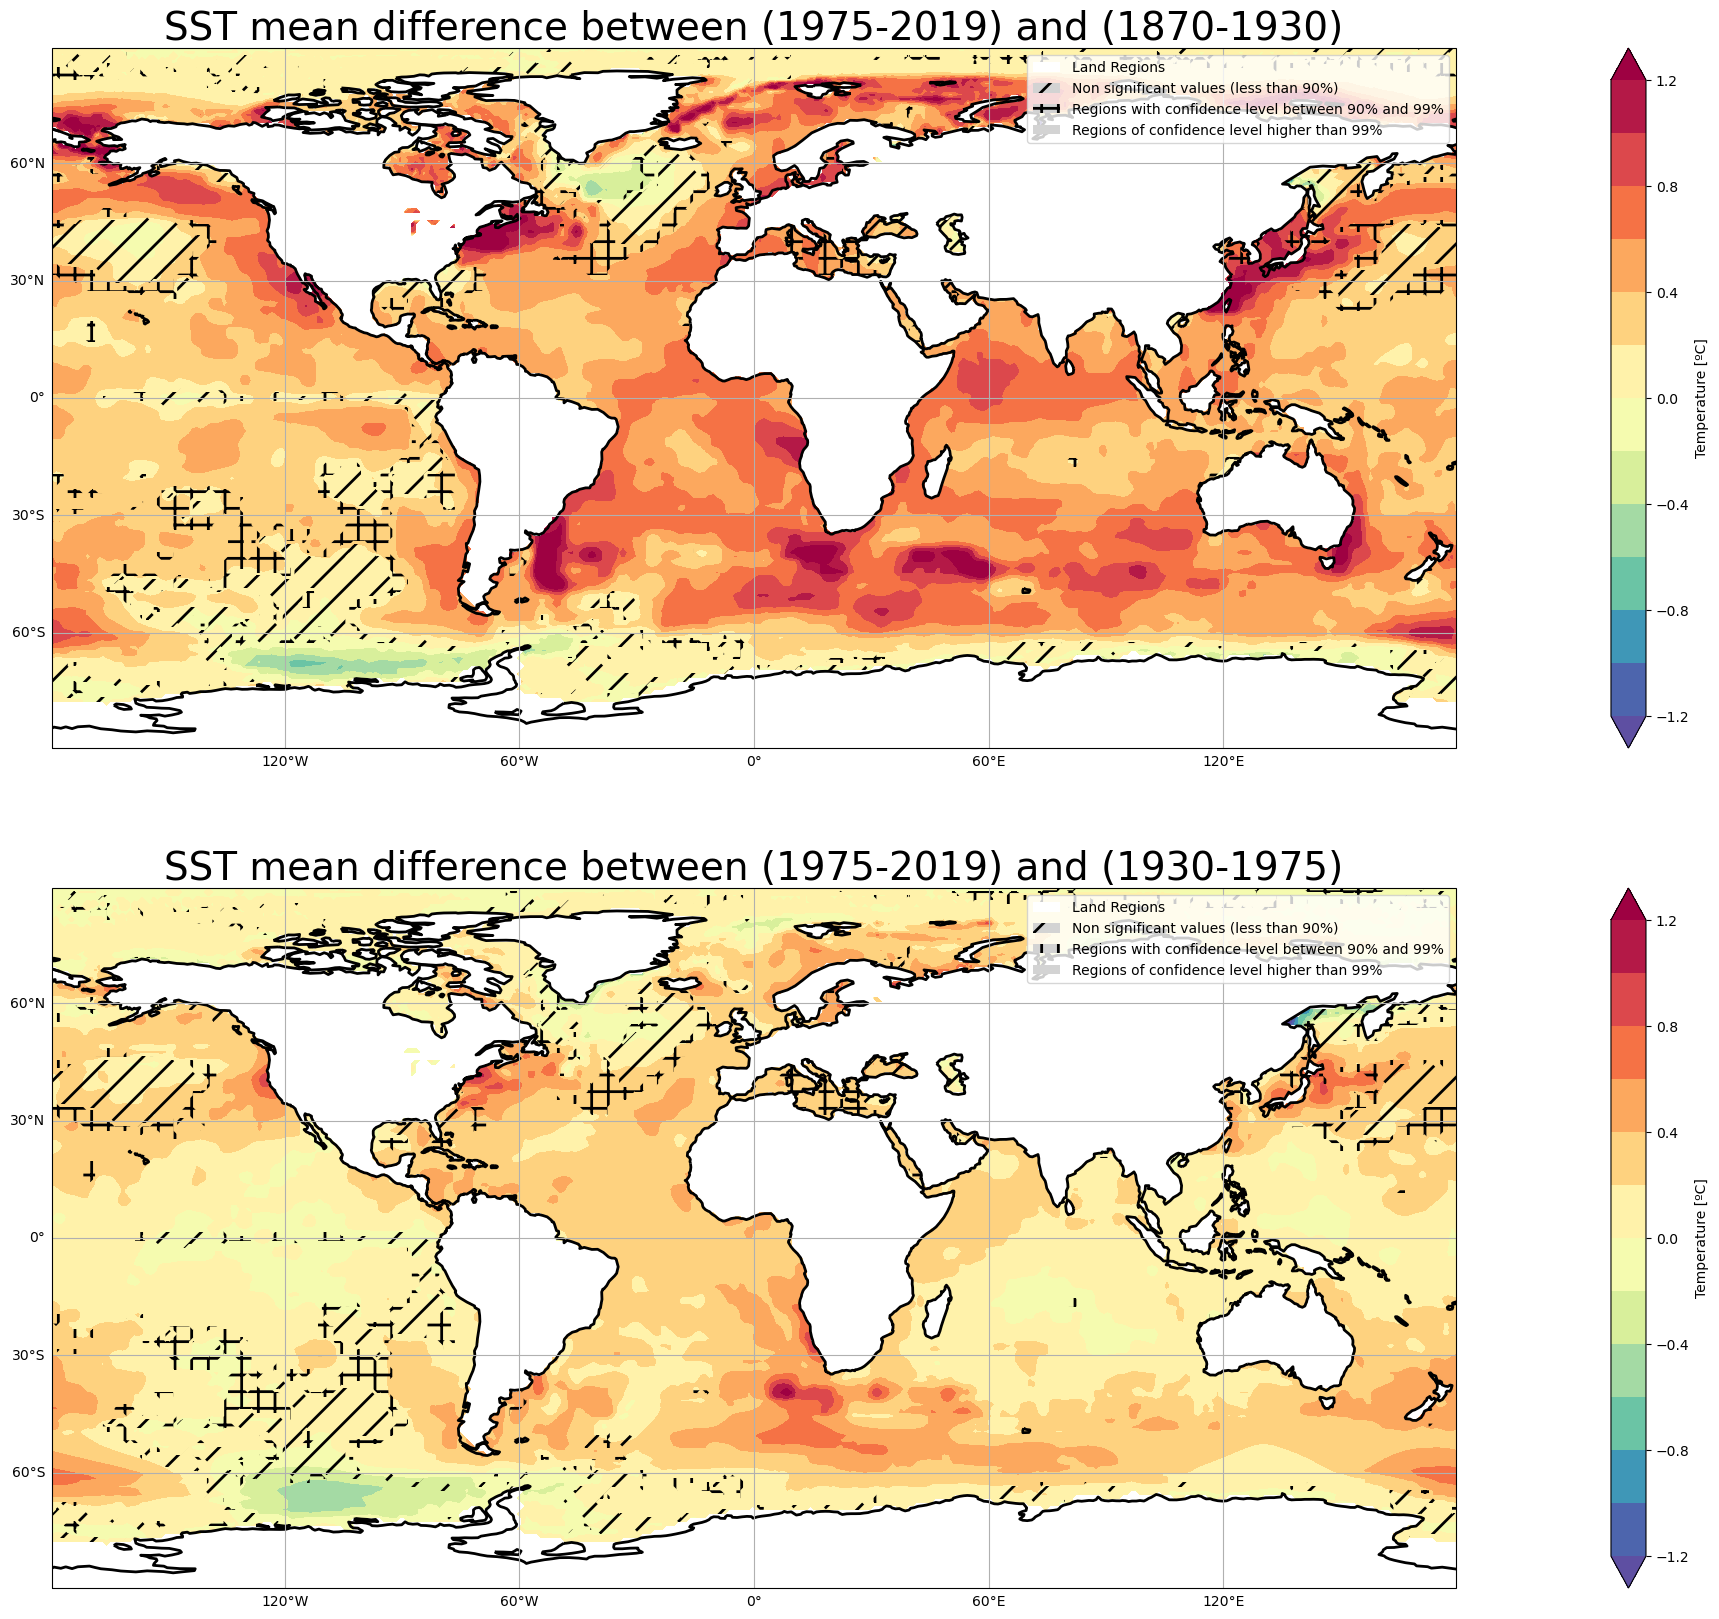

In [27]:
pvalue1= sts.ttest_ind(first_period.sst[:,:,:],third_period.sst[:,:,:],axis=0,nan_policy='omit').pvalue.data
pvalue2= sts.ttest_ind_from_stats(first_period_mean,first_period_std,first_period.sst.shape[0],third_period_mean,third_period_std,third_period.sst.shape[0]).pvalue
#pvalue2= sts.ttest_ind(first_period_mean[:,:],second_period_mean[:,:],nan_policy='omit').pvalue.data

land_1= np.full(np.shape(pvalue1), np.nan)
region1_1= np.full(np.shape(pvalue1), np.nan)
region2_1= np.full(np.shape(pvalue1), np.nan)
region23_1= np.full(np.shape(pvalue1), np.nan)
region3_1= np.full(np.shape(pvalue1), np.nan)

land_2= np.full(np.shape(pvalue1), np.nan)
region1_2= np.full(np.shape(pvalue1), np.nan)
region2_2= np.full(np.shape(pvalue1), np.nan)
region23_2= np.full(np.shape(pvalue1), np.nan)
region3_2= np.full(np.shape(pvalue1), np.nan)

for i in range(pvalue1.shape[0]):
    for j in range(pvalue1.shape[1]):
        if (pvalue1[i,j]<=0.1)&(np.isnan(pvalue1[i,j])==False): #porque queremos rechazar la hipótesis de que las medias son iguales
            if pvalue1[i,j]<=0.01:
                region3_1[i,j]=1
                region2_1[i,j]=1
            else:
                region23_1[i,j]=1
                region2_1[i,j]=1
        elif np.isnan(pvalue1[i,j])==True:
            land_1[i,j]=1        
        else:
            region1_1[i,j]= 1
            
        if (pvalue2[i,j]<=0.1)&(np.isnan(pvalue2[i,j])==False): #porque queremos rechazar la hipótesis de que las medias son iguales
            if pvalue2[i,j]<=0.01:
                region3_2[i,j]=1
                region2_2[i,j]=1
            else:
                region23_2[i,j]=1
                region2_2[i,j]=1
        elif np.isnan(pvalue2[i,j])==True:
            land_2[i,j]=1        
        else:
            region1_2[i,j]= 1


import matplotlib.patches as mpatches
            
#And plot the results:
fig = plt.figure(figsize=(40,20)) 
ax = fig.add_subplot(211, projection=ccrs.PlateCarree())
mpl.rcParams['hatch.linewidth'] = 2  # previous pdf hatch linewidth

a_val = 1
#colors = ['#EA5739','#FEFFBE','#4BB05C']
#circ1 = mpatches.Patch( facecolor=colors[0],alpha=a_val,hatch='\\\\',label='Label1')
circ1 = mpatches.Patch(facecolor='white',alpha=a_val,hatch=None,label='Land Regions')
circ2 = mpatches.Patch(facecolor='lightgrey',alpha=a_val,hatch='/',label='Non significant values (less than 90%)')
circ3 = mpatches.Patch(facecolor='lightgrey',alpha=a_val,hatch='+',label='Regions with confidence level between 90% and 99%')
circ4 = mpatches.Patch(facecolor='lightgrey',alpha=a_val,hatch=None,label='Regions of confidence level higher than 99%')

im=ax.contourf(lon,lat,mean_first_difference,cmap='Spectral_r',levels=levels3,extend='both',transform=ccrs.PlateCarree())
ax.contourf(lon,lat,land_1,transform=ccrs.PlateCarree(),hatches=[None],alpha=0)
ax.contourf(lon,lat,region1_1,transform=ccrs.PlateCarree(),hatches=['/'],alpha=0)
ax.contourf(lon,lat,region23_1,transform=ccrs.PlateCarree(),hatches=['+'],alpha=0)
ax.contourf(lon,lat,region3_1,transform=ccrs.PlateCarree(),hatches=[None],alpha=0)

ax.coastlines(linewidth=2)
ax.set_title('SST mean difference between (1975-2019) and (1870-1930)',fontsize=28)
gl=ax.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top = False
ax.legend(handles = [circ1,circ2,circ3,circ4],loc='best')
fig.colorbar(im,ax=ax,label='Temperature [ºC]')

ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())

im2=ax2.contourf(lon,lat,mean_second_difference,cmap='Spectral_r',levels=levels3,extend='both',transform=ccrs.PlateCarree())
ax2.contourf(lon,lat,land_2,transform=ccrs.PlateCarree(),hatches=[None],alpha=0)
ax2.contourf(lon,lat,region1_2,transform=ccrs.PlateCarree(),hatches=['/'],alpha=0)
ax2.contourf(lon,lat,region23_2,transform=ccrs.PlateCarree(),hatches=['+'],alpha=0)
ax2.contourf(lon,lat,region3_2,transform=ccrs.PlateCarree(),hatches=[None],alpha=0)

ax2.coastlines(linewidth=2)
ax2.set_title('SST mean difference between (1975-2019) and (1930-1975)',fontsize=28)
gl=ax2.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top = False
ax2.legend(handles = [circ1,circ2,circ3,circ4],loc='best')
fig.colorbar(im2,ax=ax2,label='Temperature [ºC]')

C:\Users\ideapad 5 15ITL05\anaconda3\envs\Analisisdatosucm2\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\ideapad 5 15ITL05\anaconda3\envs\Analisisdatosucm2\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


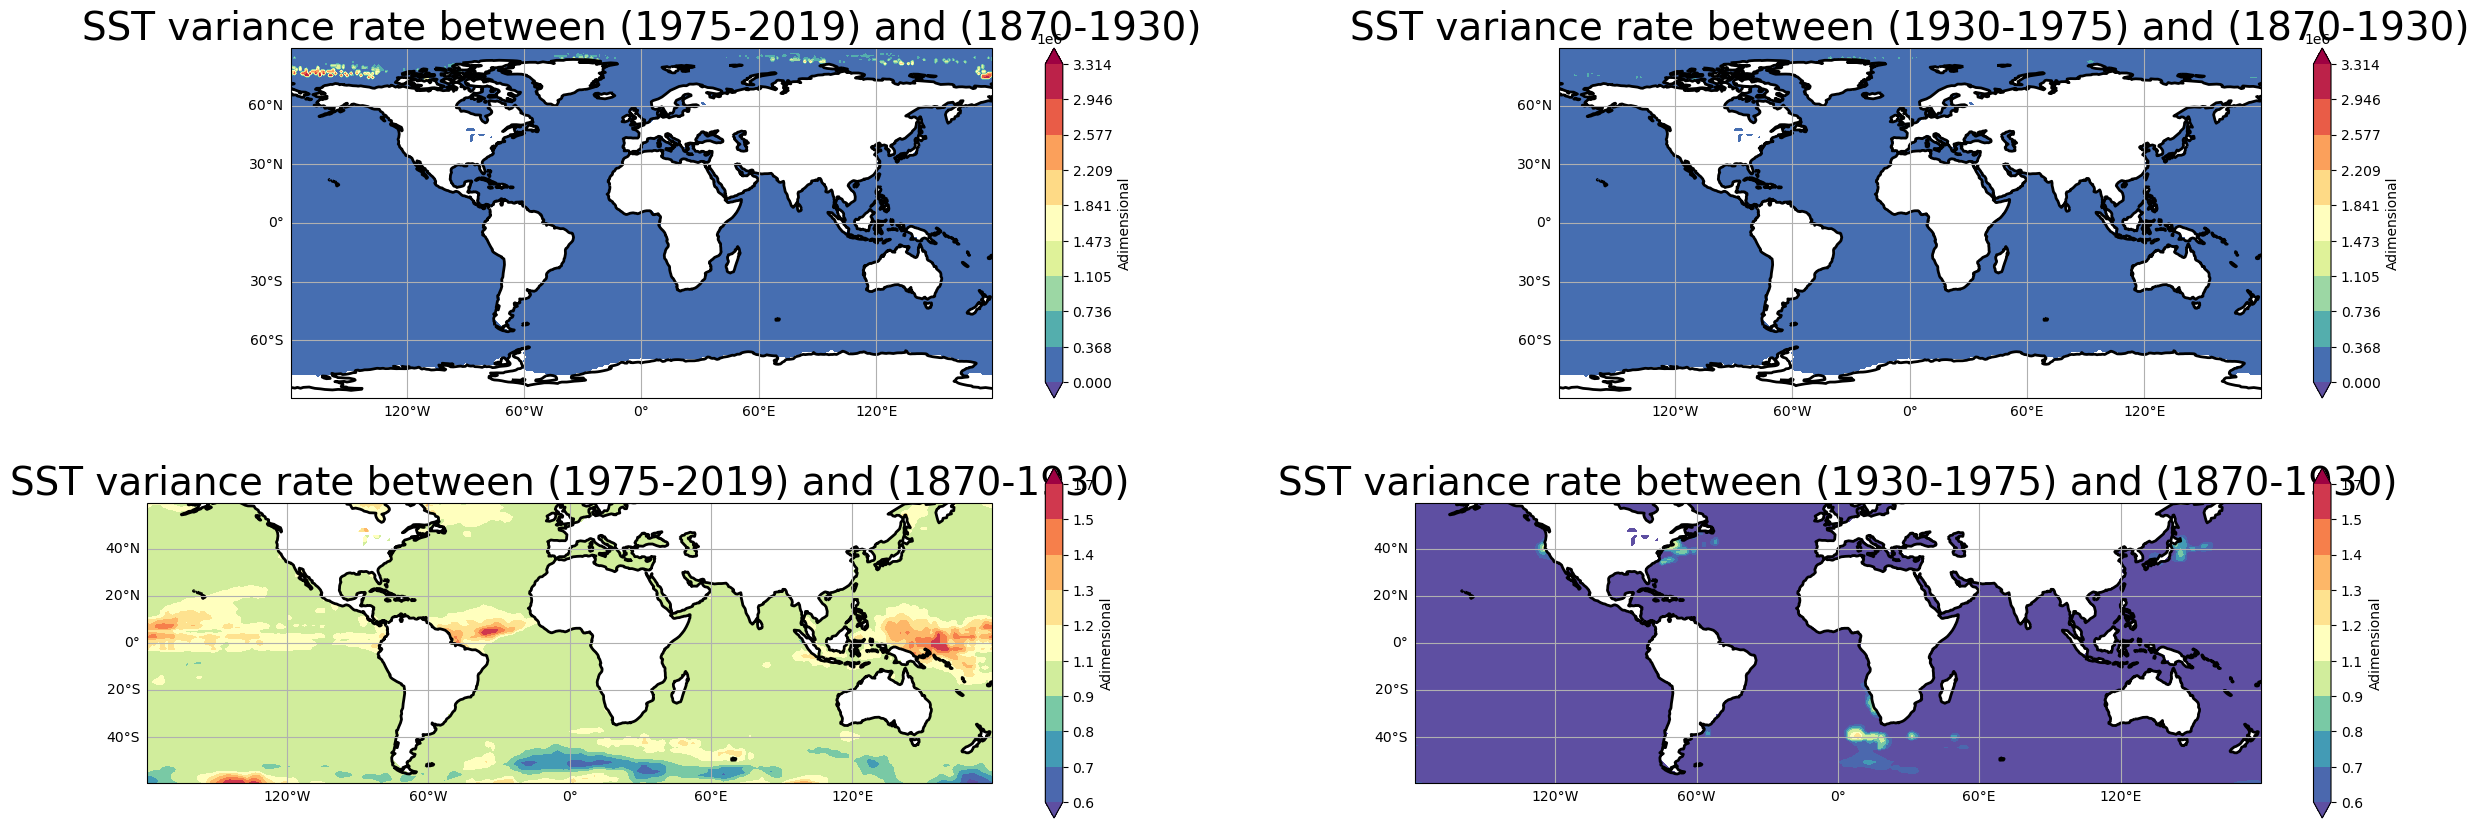

In [52]:
#Let's also calculate and plot the variance rate.
variance_first_rate= (third_period_std/first_period_std)**1 #porque es varianza y no desv estandar (var=std**2)
variance_second_rate= (second_period_std/first_period_std)**1
#There are problems with some regions (located above 60ºN and 60ºS) probably due to ice, so we should not include them.
variance_first_rate_reducedgrid= variance_first_rate[(variance_first_rate['latitude']<60)&(variance_first_rate['latitude']>-60)]
variance_second_rate_reducedgrid= variance_second_rate[(variance_second_rate['latitude']<60)&(variance_second_rate['latitude']>-60)]
mean_first_difference_reducedgrid= mean_first_difference[(mean_first_difference['latitude']<60)&(mean_first_difference['latitude']>-60)]
mean_second_difference_reducedgrid= mean_second_difference[(mean_second_difference['latitude']<60)&(mean_second_difference['latitude']>-60)]

lat_reduced= variance_first_rate_reducedgrid['latitude']

fig = plt.figure(figsize=(30,10)) 
ax1 = fig.add_subplot(221, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(222, projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(223, projection=ccrs.PlateCarree())
ax4 = fig.add_subplot(224, projection=ccrs.PlateCarree())

levels4 = np.round(np.linspace(np.min(np.array([np.min(variance_first_rate),np.min(variance_second_rate)])),np.max(np.array([np.max(variance_first_rate),np.max(variance_second_rate)])),num=10),decimals=1)
levels4_reduced = np.round(np.linspace(np.min(np.array([np.min(variance_first_rate_reducedgrid),np.min(variance_second_rate_reducedgrid)])),np.max(np.array([np.max(variance_first_rate_reducedgrid),np.max(variance_second_rate_reducedgrid)])),num=10),decimals=1)

dibujo_1_mapa_cartopy(variance_first_rate,lon,lat,'Spectral_r','Adimensional','SST variance rate between (1975-2019) and (1870-1930)', ax1,levels4)
dibujo_1_mapa_cartopy(variance_second_rate,lon,lat,'Spectral_r','Adimensional','SST variance rate between (1930-1975) and (1870-1930)', ax2,levels4)
dibujo_1_mapa_cartopy(variance_first_rate_reducedgrid,lon,lat_reduced,'Spectral_r','Adimensional','SST variance rate between (1975-2019) and (1870-1930)', ax3,levels4_reduced)
dibujo_1_mapa_cartopy(mean_second_difference_reducedgrid,lon,lat_reduced,'Spectral_r','Adimensional','SST variance rate between (1930-1975) and (1870-1930)', ax4,levels4_reduced)


In [53]:
variance_first_rate

<xarray.DataArray 'sst' (latitude: 180, longitude: 360)>
array([[4.1609111e+03, 2.2500000e+00, 9.2442979e+03, ..., 4.3399697e+03,
        4.2792446e+03, 4.1930029e+03],
       [1.0625000e+00, 1.0312500e+00, 1.0000000e+00, ..., 1.0625000e+00,
        1.0625000e+00, 1.0625000e+00],
       [8.8888890e-01, 1.0444444e+00, 1.0000000e+00, ..., 8.7037039e-01,
        1.0222223e+00, 8.3333331e-01],
       ...,
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5

C:\Users\ideapad 5 15ITL05\anaconda3\envs\Analisisdatosucm2\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\ideapad 5 15ITL05\anaconda3\envs\Analisisdatosucm2\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


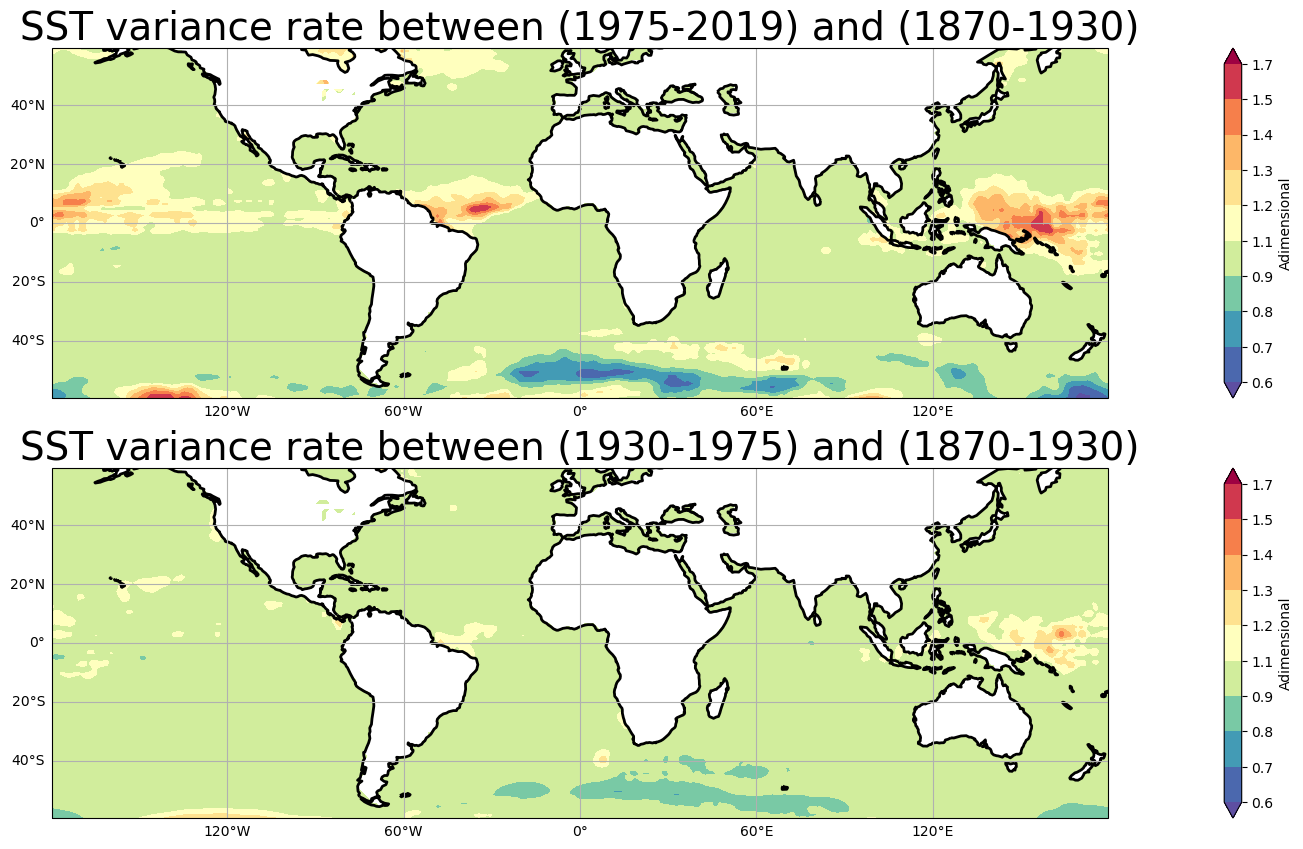

In [54]:
#Let's do it better, by changing all outputs bigger that a reasonable value to Nan.
variance_first_rate_reduced= variance_first_rate.where(variance_first_rate<2.5)
variance_second_rate_reduced= variance_second_rate.where(variance_second_rate<2.5)

fig = plt.figure(figsize=(30,10)) 
ax1 = fig.add_subplot(211, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())
lon= variance_first_rate_reducedgrid['longitude']
lat= variance_first_rate_reducedgrid['latitude']

levels5 = np.round(np.linspace(np.min(np.array([np.min(variance_first_rate_reducedgrid),np.min(variance_second_rate_reducedgrid)])),np.max(np.array([np.max(variance_first_rate_reducedgrid),np.max(variance_second_rate_reducedgrid)])),num=10),decimals=1)

dibujo_1_mapa_cartopy(variance_first_rate_reducedgrid,lon,lat,'Spectral_r','Adimensional','SST variance rate between (1975-2019) and (1870-1930)', ax1,levels5)
dibujo_1_mapa_cartopy(variance_second_rate_reducedgrid,lon,lat,'Spectral_r','Adimensional','SST variance rate between (1930-1975) and (1870-1930)', ax2,levels5)


In [27]:
n1= first_period.time.shape[0]
n2= second_period.time.shape[0]
n3= third_period.time.shape[0]
pvalue_var= sts.f.cdf(variance_first_rate,n1-1,n2-1)
pvalue_var

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.77322569, 0.64756351, 0.49838545, ..., 0.77322569, 0.77322569,
        0.77322569],
       [0.07019077, 0.70427016, 0.49838545, ..., 0.04111266, 0.60620182,
        0.01122006],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [175]:
mean_first_difference.shape
variance_first_rate.shape

(180, 360)

In [176]:
variance_first_rate_reducedgrid
variance_second_rate_reducedgrid

<xarray.DataArray 'sst' (latitude: 120, longitude: 360)>
array([[1.0911553 , 1.082263  , 1.0757906 , ..., 1.0880249 , 1.1046168 ,
        1.1018606 ],
       [1.0774785 , 1.0715224 , 1.0562437 , ..., 1.0538551 , 1.0641999 ,
        1.0717919 ],
       [1.0427246 , 1.0419648 , 1.0349871 , ..., 1.0237155 , 1.0317843 ,
        1.0385158 ],
       ...,
       [0.87518746, 0.87944305, 0.8830339 , ..., 0.8657401 , 0.86832386,
        0.87189955],
       [0.86405015, 0.8689202 , 0.8726413 , ..., 0.8522217 , 0.8544374 ,
        0.8593603 ],
       [0.85603327, 0.86114174, 0.8648192 , ..., 0.83729476, 0.83462465,
        0.84855855]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 59.5 58.5 57.5 56.5 ... -57.5 -58.5 -59.5

In [55]:
#As before, let's continue by plotting also the significance.
loweric_1= sts.f.interval(0.95,dfn=n3-1,dfd=n1-1)[0]
#loweric_1= sts.f.ppf(0.05/2,n3-1,n1-1,loc=mean_first_difference_reducedgrid,scale=variance_first_rate_reducedgrid)
higheric_1= sts.f.interval(0.95,dfn=n3-1,dfd=n1-1)[1]
#higheric_1= sts.f.ppf(1-0.05/2,n3-1,n1-1,loc=mean_first_difference_reducedgrid,scale=variance_first_rate_reducedgrid)

loweric_2= sts.f.interval(0.95,dfn=n3-1,dfd=n2-1)[0]
higheric_2= sts.f.interval(0.95,dfn=n3-1,dfd=n2-1)[1]

1.5207560174526784

In [282]:
print(loweric_1[0,0])
print(higheric_1[0,0])


1.4954096665112342
1.8585266951415187


In [63]:
A= variance_first_rate_reducedgrid
AA= (A>loweric_1)&(A<higheric_1)
AA

<xarray.DataArray 'sst' (latitude: 120, longitude: 360)>
array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 59.5 58.5 57.5 56.5 ... -57.5 -58.5 -59.5

In [59]:
def testt_f (sample1,sample2, alfa):
    
    nt1 = np.shape(sample1)[0]
    nt2 = np.shape(sample2)[0]
    
    f1 = stats.f.ppf(alfa/2,  dfn = nt1-1, dfd = nt2-1)
    f2 = stats.f.ppf(1-alfa/2, dfn = nt1-1, dfd = nt2-1)
    
    F = (sample1.var(dim='time', ddof=1) / sample2.var(dim='time', ddof=1))
    A = (f1<=F) | (F>=f2)
    
    mx = ma.masked_array(sample1.var(axis=0,ddof=1)/sample2.var(axis=0,ddof=1), A)
    return A, mx

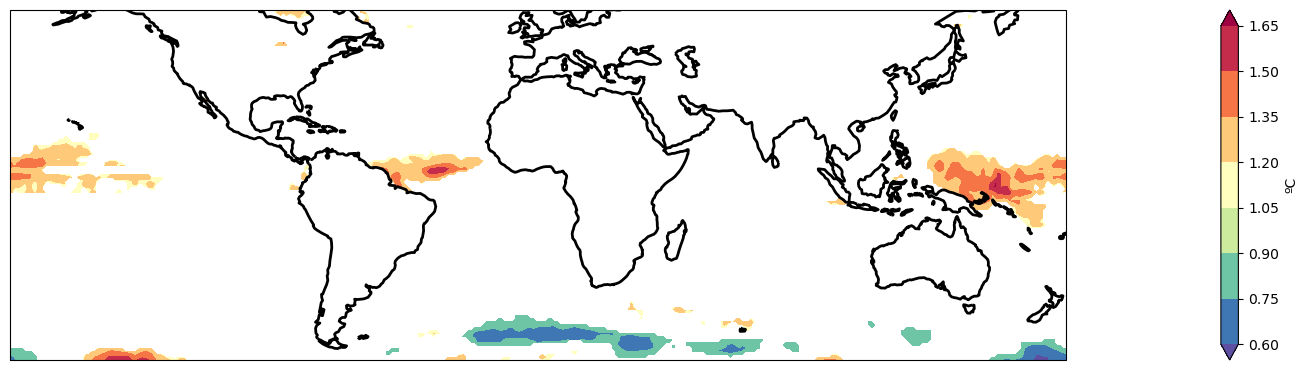

In [64]:
m= ma.masked_array(variance_first_rate_reducedgrid,AA)
fig = plt.figure(figsize=(40, 10))
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree(0))
im=ax.contourf(lon,lat,m,cmap='Spectral_r',extend='both'
               ,transform = ccrs.PlateCarree())
fig.colorbar(im,ax=ax,label='ºC') #Para la barra de colores

ax.coastlines(linewidth=2)

In [193]:
help(sts.f.ppf)

Help on method ppf in module scipy.stats._distn_infrastructure:

ppf(q, *args, **kwds) method of scipy.stats._continuous_distns.f_gen instance
    Percent point function (inverse of `cdf`) at q of the given RV.
    
    Parameters
    ----------
    q : array_like
        lower tail probability
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    x : array_like
        quantile corresponding to the lower tail probability q.



In [126]:
land_1= (np.isnan(variance_first_rate))*1
region1_1= ((variance_first_rate>loweric_1)&(variance_first_rate<higheric_1)&(np.isnan(variance_first_rate)==False))*1 #multiplicamos por 1 para pasar de True/False a 1/0

region3_1= (((variance_first_rate<loweric_1)|(variance_first_rate>higheric_1))&(np.isnan(variance_first_rate)==False))*1

land_2= (variance_second_rate==np.nan)*1
region1_2= ((variance_second_rate>loweric_2)&(variance_second_rate<higheric_2)&(np.isnan(variance_second_rate)==False))*1 
region3_2= ((variance_second_rate<loweric_2)|(variance_second_rate>higheric_2)&(np.isnan(variance_second_rate)==False))*1

In [116]:
print(np.where(region3_1==0))
region3_1

(array([  0,   0,   0, ..., 119, 119, 119], dtype=int64), array([  0,   1,   2, ..., 330, 331, 332], dtype=int64))


<xarray.DataArray 'sst' (latitude: 120, longitude: 360)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 59.5 58.5 57.5 56.5 ... -57.5 -58.5 -59.5

In [128]:
variance_first_rate= variance_first_rate_reducedgrid
variance_second_rate= variance_second_rate_reducedgrid

land_1= np.full(np.shape(variance_first_rate), np.nan)
region1_1= np.full(np.shape(variance_first_rate), np.nan)
region3_1= np.full(np.shape(variance_first_rate), np.nan)

land_2= np.full(np.shape(variance_first_rate), np.nan)
region1_2= np.full(np.shape(variance_first_rate), np.nan)
region3_2= np.full(np.shape(variance_first_rate), np.nan)

for i in range(variance_first_rate.shape[0]):
    for j in range(variance_first_rate.shape[1]):
        if (variance_first_rate[i,j]>=loweric_1)&(variance_first_rate[i,j]<=higheric_1)&(np.isnan(variance_first_rate[i,j])==False): 
            #porque queremos rechazar la hipótesis de que las varianzas son iguales
            region1_1[i,j]= 1
        elif np.isnan(variance_first_rate[i,j])==True:
            land_1[i,j]= 1    
        else:
            region3_1[i,j]= 1
                
        if (variance_second_rate[i,j]>=loweric_2)&(variance_second_rate[i,j]<=higheric_2)&(np.isnan(variance_second_rate[i,j])==False): #porque queremos rechazar la hipótesis de que las medias son iguales
            region1_2[i,j]= 1
        elif np.isnan(variance_second_rate[i,j])==True:
            land_2[i,j]= 1    
        else:
            region3_2[i,j]= 1

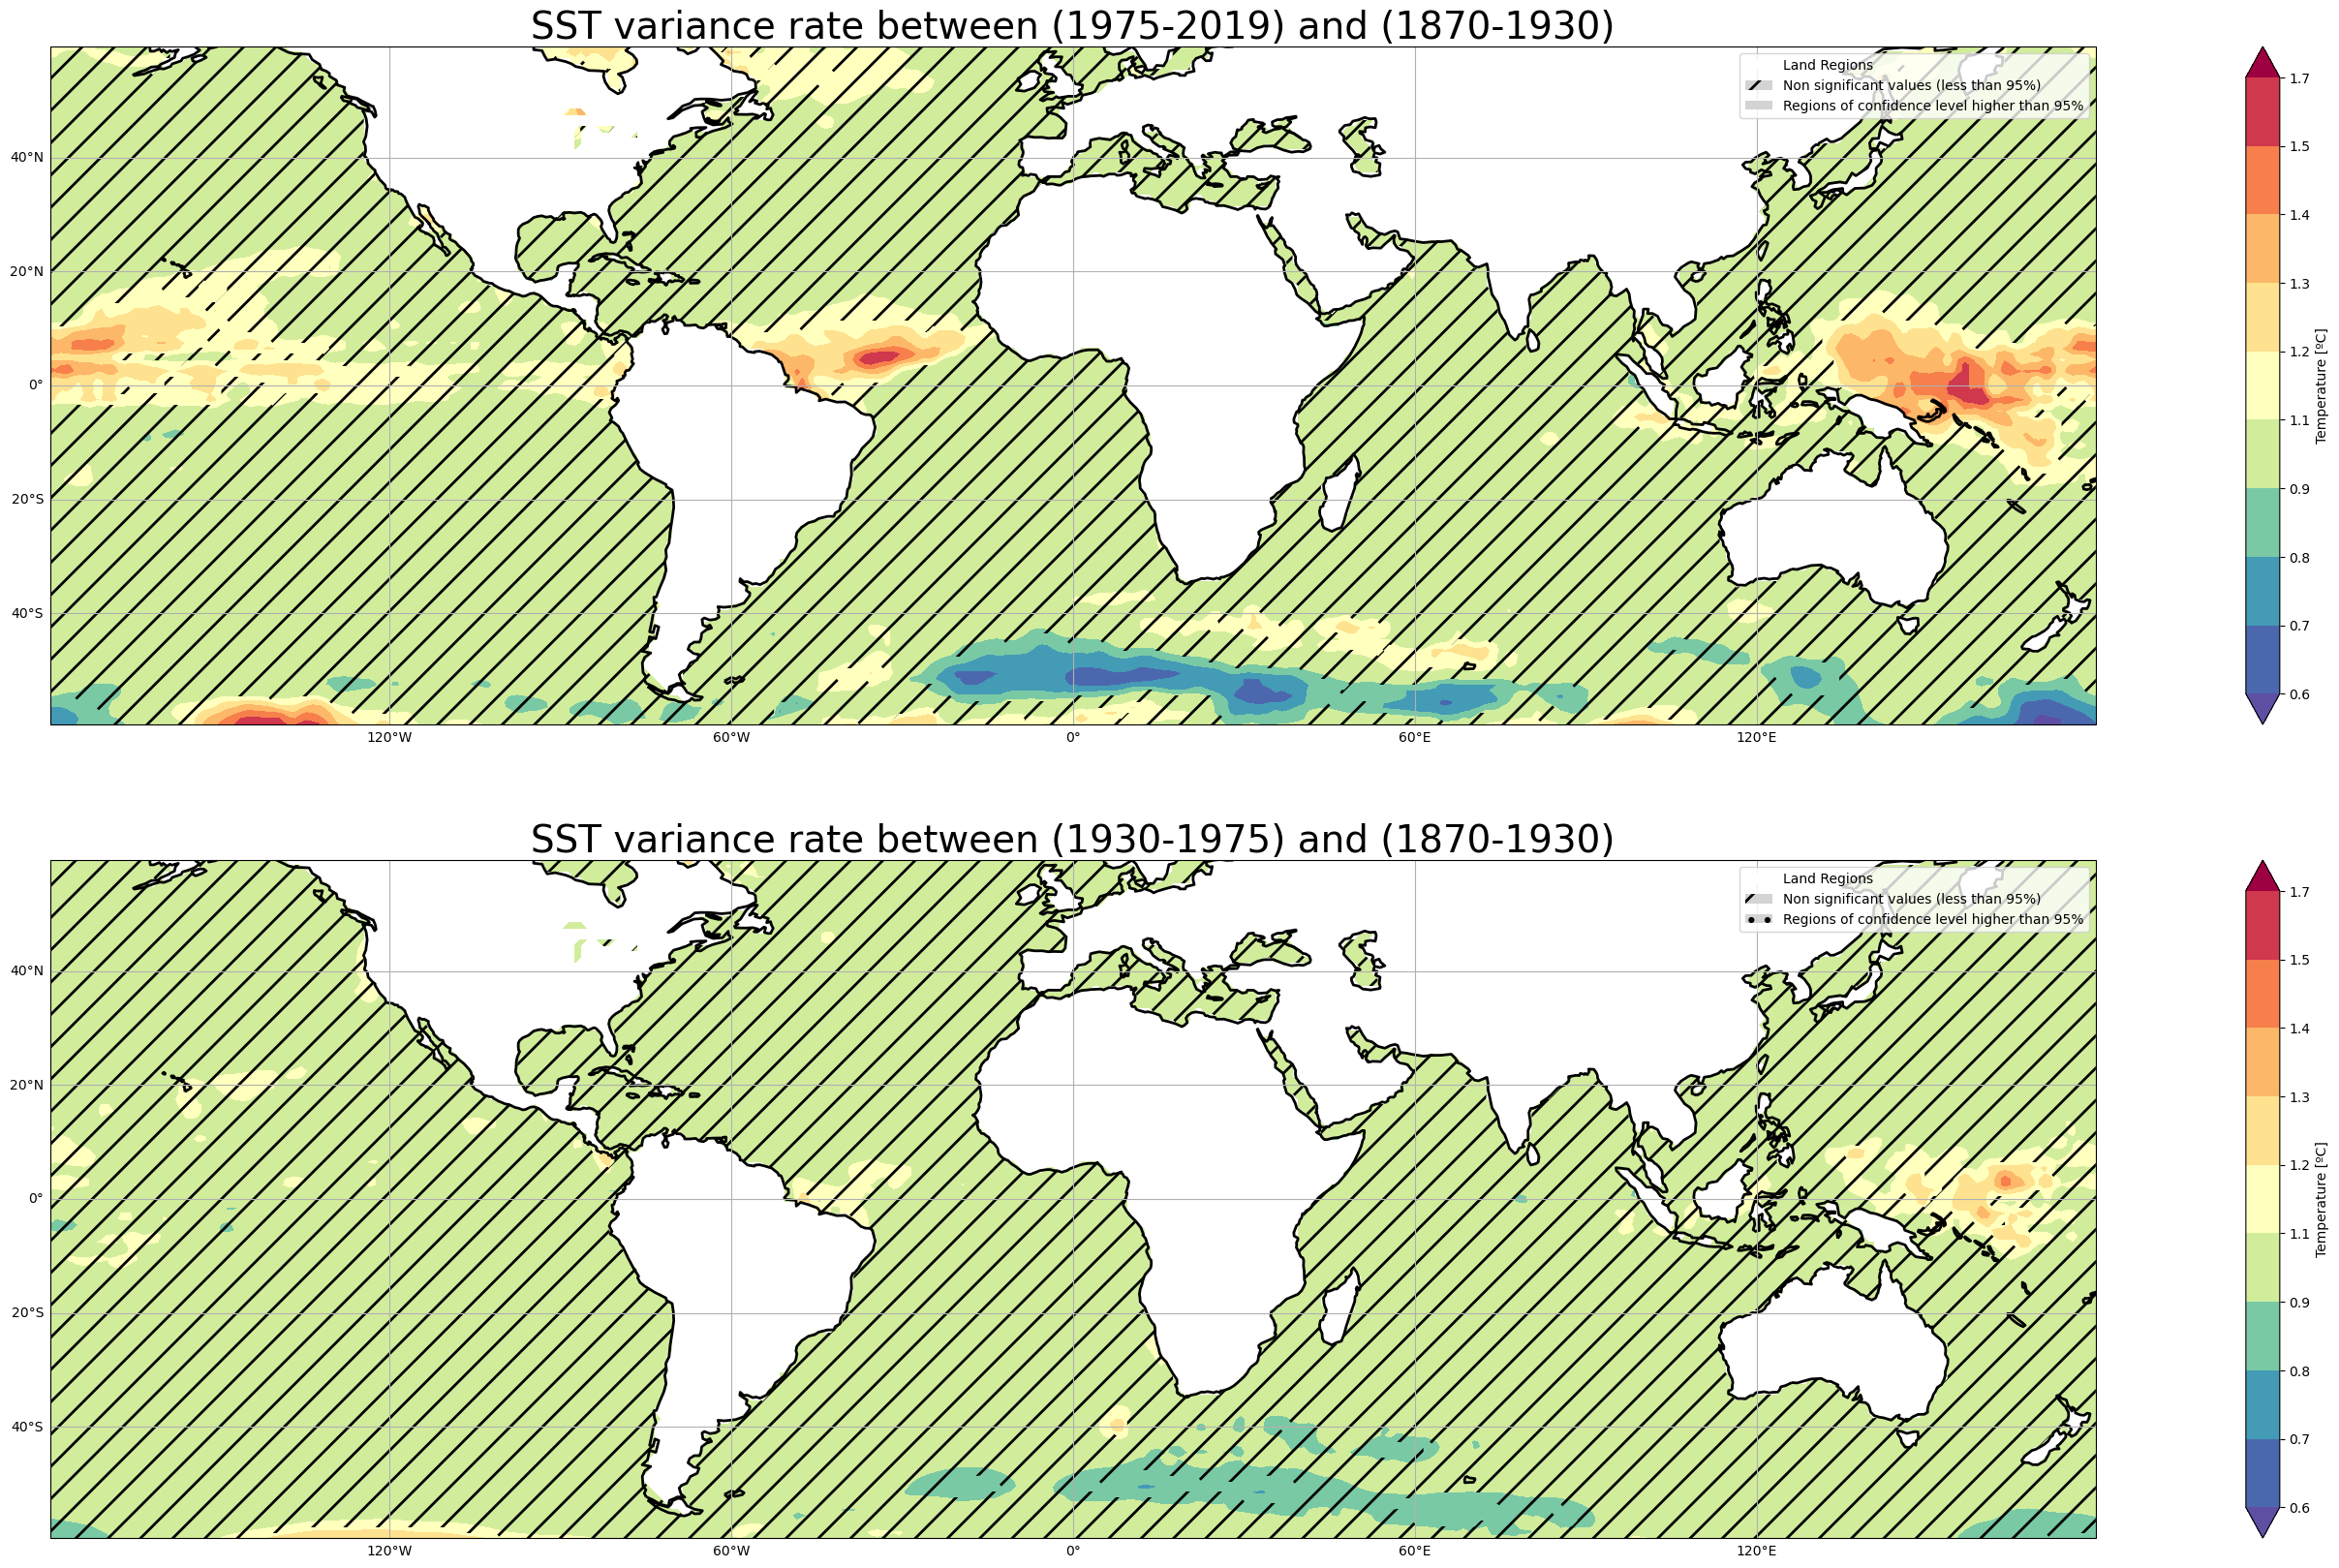

In [130]:
#And plot the results:
fig = plt.figure(figsize=(40,20)) 
ax = fig.add_subplot(211, projection=ccrs.PlateCarree())
mpl.rcParams['hatch.linewidth'] = 2  # previous pdf hatch linewidth

a_val = 1
#colors = ['#EA5739','#FEFFBE','#4BB05C']
#circ1 = mpatches.Patch( facecolor=colors[0],alpha=a_val,hatch='\\\\',label='Label1')
circ1 = mpatches.Patch(facecolor='white',alpha=a_val,hatch=None,label='Land Regions')
circ2 = mpatches.Patch(facecolor='lightgrey',alpha=a_val,hatch='/',label='Non significant values (less than 95%)')
circ3 = mpatches.Patch(facecolor='lightgrey',alpha=a_val,hatch='.',label='Regions of confidence level higher than 95%')

im=ax.contourf(lon,lat,variance_first_rate,cmap='Spectral_r',levels=levels5,extend='both',transform=ccrs.PlateCarree())
ax.contourf(lon,lat,land_1,transform=ccrs.PlateCarree(),hatches=[None],alpha=0)
ax.contourf(lon,lat,region1_1,transform=ccrs.PlateCarree(),hatches=['/'],alpha=0)
ax.contourf(lon,lat,region3_1,transform=ccrs.PlateCarree(),hatches=[None],alpha=0)
ax.coastlines(linewidth=2)
ax.set_title('SST variance rate between (1975-2019) and (1870-1930)',fontsize=28)
gl=ax.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top = False
ax.legend(handles = [circ1,circ2,circ3],loc='best')
fig.colorbar(im,ax=ax,label='Temperature [ºC]')

ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())
im3=ax2.contourf(lon,lat,variance_second_rate,cmap='Spectral_r',levels=levels5,extend='both',transform=ccrs.PlateCarree())
ax2.contourf(lon,lat,land_2,transform=ccrs.PlateCarree(),hatches=[None],alpha=0)
ax2.contourf(lon,lat,region1_2,transform=ccrs.PlateCarree(),hatches=['/'],alpha=0)
ax2.contourf(lon,lat,region3_2,transform=ccrs.PlateCarree(),hatches=[None],alpha=0)
ax2.coastlines(linewidth=2)
ax2.set_title('SST variance rate between (1930-1975) and (1870-1930)',fontsize=28)
gl=ax2.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top = False
ax2.legend(handles = [circ1,circ2,circ3],loc='best')
fig.colorbar(im3,ax=ax2,label='Temperature [ºC]')

In [293]:
loweric_1

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.90578576, 0.87914489, 0.85250402, ..., 0.90578576, 0.90578576,
        0.90578576],
       [0.75778064, 0.89039332, 0.85250402, ..., 0.74199342, 0.87144872,
        0.71041893],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [296]:
region1_1

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [266]:
(sts.f.cdf(variance_first_rate,n3-1,n1-1))/2

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.38749904, 0.32499491, 0.25087157, ..., 0.38749904, 0.38749904,
        0.38749904],
       [0.03694203, 0.3531914 , 0.25087157, ..., 0.02201057, 0.30443705,
        0.00630171],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [267]:
help(sts.f.interval)

Help on method interval in module scipy.stats._distn_infrastructure:

interval(confidence=None, *args, **kwds) method of scipy.stats._continuous_distns.f_gen instance
    Confidence interval with equal areas around the median.
    
    .. deprecated:: 1.9.0
       Parameter `alpha` is replaced by parameter `confidence` to avoid
       name collisions with the shape parameter `alpha` of some
       distributions. Parameter `alpha` will be removed in SciPy 1.11.0.
    
    Parameters
    ----------
    confidence : array_like of float
        Probability that an rv will be drawn from the returned range.
        Each value should be in the range [0, 1].
    arg1, arg2, ... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        location parameter, Default is 0.
    scale : array_like, optional
        scale parameter, Default is 1.
    
    Returns
    -------
    a, b : nd

In [289]:
sts.f.interval(confidence=0.99,dfn=n3-1,dfd=n1-1,loc=mean_first_difference,scale=variance_first_rate)[1].shape


(180, 360)

In [284]:
variance_first_rate

<xarray.DataArray 'sst' (latitude: 180, longitude: 360)>
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [1.0625   , 1.03125  , 1.       , ..., 1.0625   , 1.0625   ,
        1.0625   ],
       [0.8888889, 1.0444444, 1.       , ..., 0.8703704, 1.0222223,
        0.8333333],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5